In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import boto3
from botocore.client import Config
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
from time import time
from pandas.plotting import register_matplotlib_converters

os.chdir('C:\\Users\\A Sua\\Documents\\AWS\\credentials')
list_of_lines = []
with open('capstoner_key.txt') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        list_of_lines.append(line)
    fp.close()


location = list_of_lines[0].split('=')[1]
AWS_ACCESS_KEY_ID = list_of_lines[1].split('=')[1]
AWS_SECRET_ACCESS_KEY = list_of_lines[2].split('=')[1]
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')
%matplotlib notebook

In [3]:
register_matplotlib_converters()
%matplotlib notebook

### import volume

In [4]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_volume07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_volume = pd.read_csv(StringIO(csv_string))
df_volume.index = df_volume['Unnamed: 0']
df_volume = df_volume.drop('Unnamed: 0', axis=1)
df_volume.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
df_volume = df_volume.T
df_volume.index = pd.to_datetime(df_volume.index)
print(df_volume.shape)
df_volume.head()

(3020, 388)


date        ORCL_ORACLE CORP  MSFT_MICROSOFT CORP  \
2007-01-03        52271846.0           77630458.0   
2007-01-04        34992680.0           46650955.0   
2007-01-05        33812092.0           44681937.0   
2007-01-08        31018863.0           52021978.0   
2007-01-09        31417003.0           44708046.0   

date        TROW_T ROWE PRICE GROUP INC  HON_HONEYWELL INTERNATIONAL INC  \
2007-01-03                    2605194.0                        3505100.0   
2007-01-04                    1598889.0                        2630200.0   
2007-01-05                    1718799.0                        3035100.0   
2007-01-08                    1275148.0                        2589100.0   
2007-01-09                    1410212.0                        3043900.0   

date        ADM_ARCHER DANIELS MIDLAND CO  FISV_FISERV INC  CERN_CERNER CORP  \
2007-01-03                      7380900.0        2158512.0          402956.0   
2007-01-04                      4442000.0        2033830.0         1058405.0   
2007-01-05                      5798200.0        1115382.0          521614.0   
2007-01-08                      4892600.0         885542.0          421489.0   
2007-01-09                      5121500.0         977683.0          295087.0   

date        KO_COCA COLA CO  CDNS_CADENCE DESIGN SYSTEMS INC  \
2007-01-03        7877300.0                        5255167.0   
2007-01-04        5908400.0                        4787252.0   
2007-01-05        5803900.0                        2890028.0   
2007-01-08        8775500.0                        3536183.0   
2007-01-09        6862200.0                        4027561.0   

date        ED_CONSOLIDATED EDISON INC  ...  ROST_ROSS STORES INC  \
2007-01-03                   1444700.0  ...             2423843.0   
2007-01-04                   1500300.0  ...             1521653.0   
2007-01-05                   1167200.0  ...             1886755.0   
2007-01-08                   1278800.0  ...             1342913.0   
2007-01-09                   1927200.0  ...             1447604.0   

date        IPGP_I P G PHOTONICS CORP  UNH_UNITED HEALTHCARE  \
2007-01-03                   193398.0              8361300.0   
2007-01-04                   253412.0              5154600.0   
2007-01-05                   192191.0              6215700.0   
2007-01-08                    82297.0              4344100.0   
2007-01-09                   119112.0              5484000.0   

date        UA_UNDER ARMOUR INC  MKC_MCCORMICK & CO INC  LEN_LENNAR CORP  \
2007-01-03             834900.0                770000.0        3795700.0   
2007-01-04             400400.0                585400.0        1933000.0   
2007-01-05             646200.0                464800.0        1893800.0   
2007-01-08             447700.0                683600.0        1973300.0   
2007-01-09             412300.0                596100.0        1295400.0   

date        TAP_MOLSON COORS BREWING CO  STZ_CONSTELLATION BRANDS INC  \
2007-01-03                     991400.0                     2501000.0   
2007-01-04                     776300.0                     9150100.0   
2007-01-05                     514000.0                     7236300.0   
2007-01-08                     575200.0                     3062200.0   
2007-01-09                     467600.0                     1764400.0   

date        CBS_CBS CORP  CMG_CHIPOTLE MEXICAN GRILL INC  
2007-01-03     3188900.0                        519300.0  
2007-01-04     4001000.0                        471200.0  
2007-01-05     6480300.0                        508800.0  
2007-01-08     3138400.0                        286500.0  
2007-01-09     3249500.0                        571600.0  

[5 rows x 388 columns]

### import sharesout

In [5]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_shares_out07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_sharesout = pd.read_csv(StringIO(csv_string))
df_sharesout.index = df_sharesout['Unnamed: 0']
df_sharesout = df_sharesout.drop('Unnamed: 0', axis=1)
df_sharesout.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
df_sharesout = df_sharesout.T
df_sharesout.index = pd.to_datetime(df_sharesout.index)
print(df_sharesout.shape)
df_sharesout.head()

(3020, 388)


date        ORCL_ORACLE CORP  MSFT_MICROSOFT CORP  \
2007-01-03         5182191.0            9777000.0   
2007-01-04         5182191.0            9777000.0   
2007-01-05         5182191.0            9777000.0   
2007-01-08         5182191.0            9777000.0   
2007-01-09         5182191.0            9777000.0   

date        TROW_T ROWE PRICE GROUP INC  HON_HONEYWELL INTERNATIONAL INC  \
2007-01-03                     264960.0                         816510.0   
2007-01-04                     264960.0                         816510.0   
2007-01-05                     264960.0                         816510.0   
2007-01-08                     264960.0                         816510.0   
2007-01-09                     264960.0                         816510.0   

date        ADM_ARCHER DANIELS MIDLAND CO  FISV_FISERV INC  CERN_CERNER CORP  \
2007-01-03                       657246.0         171091.0           78392.0   
2007-01-04                       657246.0         171091.0           78392.0   
2007-01-05                       657246.0         171091.0           78392.0   
2007-01-08                       657246.0         171091.0           78392.0   
2007-01-09                       657246.0         171091.0           78392.0   

date        KO_COCA COLA CO  CDNS_CADENCE DESIGN SYSTEMS INC  \
2007-01-03        2343796.0                         274912.0   
2007-01-04        2343796.0                         274912.0   
2007-01-05        2343796.0                         274912.0   
2007-01-08        2343796.0                         274912.0   
2007-01-09        2343796.0                         274912.0   

date        ED_CONSOLIDATED EDISON INC  ...  ROST_ROSS STORES INC  \
2007-01-03                    256794.0  ...              139749.0   
2007-01-04                    256794.0  ...              139749.0   
2007-01-05                    256794.0  ...              139749.0   
2007-01-08                    256794.0  ...              139749.0   
2007-01-09                    256794.0  ...              139749.0   

date        IPGP_I P G PHOTONICS CORP  UNH_UNITED HEALTHCARE  \
2007-01-03                    42902.0              1346996.0   
2007-01-04                    42902.0              1346996.0   
2007-01-05                    42902.0              1346996.0   
2007-01-08                    42902.0              1346996.0   
2007-01-09                    42902.0              1346996.0   

date        UA_UNDER ARMOUR INC  MKC_MCCORMICK & CO INC  LEN_LENNAR CORP  \
2007-01-03              34388.0                117959.0         126730.0   
2007-01-04              34388.0                117959.0         126730.0   
2007-01-05              34388.0                117959.0         126730.0   
2007-01-08              34388.0                117959.0         126730.0   
2007-01-09              34388.0                117959.0         126730.0   

date        TAP_MOLSON COORS BREWING CO  STZ_CONSTELLATION BRANDS INC  \
2007-01-03                      83206.0                      209580.0   
2007-01-04                      83206.0                      209580.0   
2007-01-05                      83206.0                      209580.0   
2007-01-08                      83206.0                      209580.0   
2007-01-09                      83206.0                      209580.0   

date        CBS_CBS CORP  CMG_CHIPOTLE MEXICAN GRILL INC  
2007-01-03      719327.0                         18425.0  
2007-01-04      719327.0                         18425.0  
2007-01-05      719327.0                         18425.0  
2007-01-08      719327.0                         18425.0  
2007-01-09      719327.0                         18425.0  

[5 rows x 388 columns]

### volume/sharesout

In [6]:
df_volume_sharesout = df_volume/df_sharesout
df_volume_sharesout.head()

date        ORCL_ORACLE CORP  MSFT_MICROSOFT CORP  \
2007-01-03         10.086824             7.940110   
2007-01-04          6.752488             4.771500   
2007-01-05          6.524671             4.570107   
2007-01-08          5.985666             5.320853   
2007-01-09          6.062494             4.572778   

date        TROW_T ROWE PRICE GROUP INC  HON_HONEYWELL INTERNATIONAL INC  \
2007-01-03                     9.832405                         4.292783   
2007-01-04                     6.034454                         3.221271   
2007-01-05                     6.487013                         3.717162   
2007-01-08                     4.812606                         3.170935   
2007-01-09                     5.322358                         3.727940   

date        ADM_ARCHER DANIELS MIDLAND CO  FISV_FISERV INC  CERN_CERNER CORP  \
2007-01-03                      11.230042        12.616163          5.140269   
2007-01-04                       6.758504        11.887417         13.501441   
2007-01-05                       8.821963         6.519232          6.653919   
2007-01-08                       7.444092         5.175854          5.376684   
2007-01-09                       7.792364         5.714403          3.764249   

date        KO_COCA COLA CO  CDNS_CADENCE DESIGN SYSTEMS INC  \
2007-01-03         3.360915                        19.115815   
2007-01-04         2.520868                        17.413761   
2007-01-05         2.476282                        10.512557   
2007-01-08         3.744140                        12.862963   
2007-01-09         2.927815                        14.650364   

date        ED_CONSOLIDATED EDISON INC  ...  ROST_ROSS STORES INC  \
2007-01-03                    5.625910  ...             17.344260   
2007-01-04                    5.842426  ...             10.888471   
2007-01-05                    4.545278  ...             13.501027   
2007-01-08                    4.979867  ...              9.609464   
2007-01-09                    7.504848  ...             10.358600   

date        IPGP_I P G PHOTONICS CORP  UNH_UNITED HEALTHCARE  \
2007-01-03                   4.507902               6.207368   
2007-01-04                   5.906764               3.826737   
2007-01-05                   4.479768               4.614490   
2007-01-08                   1.918256               3.225028   
2007-01-09                   2.776374               4.071282   

date        UA_UNDER ARMOUR INC  MKC_MCCORMICK & CO INC  LEN_LENNAR CORP  \
2007-01-03            24.278818                6.527692        29.951077   
2007-01-04            11.643597                4.962741        15.252900   
2007-01-05            18.791439                3.940352        14.943581   
2007-01-08            13.019076                5.795234        15.570899   
2007-01-09            11.989648                5.053451        10.221731   

date        TAP_MOLSON COORS BREWING CO  STZ_CONSTELLATION BRANDS INC  \
2007-01-03                    11.915006                     11.933391   
2007-01-04                     9.329856                     43.659223   
2007-01-05                     6.177439                     34.527627   
2007-01-08                     6.912963                     14.611127   
2007-01-09                     5.619787                      8.418742   

date        CBS_CBS CORP  CMG_CHIPOTLE MEXICAN GRILL INC  
2007-01-03      4.433172                       28.184532  
2007-01-04      5.562144                       25.573948  
2007-01-05      9.008837                       27.614654  
2007-01-08      4.362967                       15.549525  
2007-01-09      4.517417                       31.023066  

[5 rows x 388 columns]

### sigmas

<IPython.core.display.Javascript object>


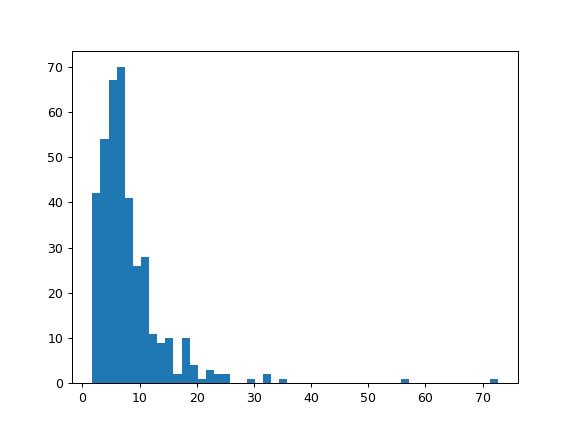

In [7]:
sigmas = []
for symbol in df_volume_sharesout.columns:
    temp_sigma = round(df_volume_sharesout[symbol].describe()['std'], 4)
    sigmas.append(temp_sigma)
sigmas = pd.Series(sigmas)
plt.hist(sigmas, bins=50)
plt.show()

### means

<IPython.core.display.Javascript object>


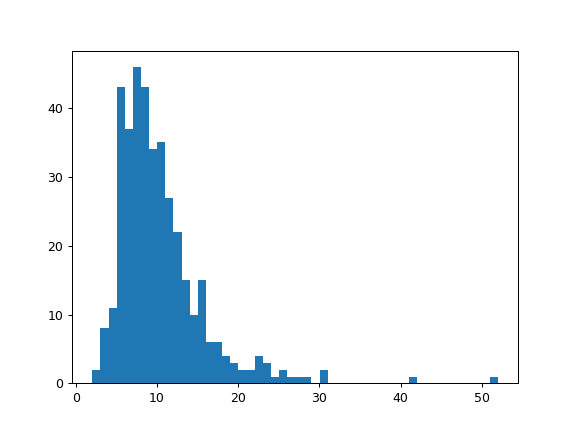

In [8]:
means = []
for symbol in df_volume_sharesout.columns:
    temp_mean = round(df_volume_sharesout[symbol].describe()['mean'], 4)
    means.append(temp_mean)
means = pd.Series(means)

plt.hist(means, 50)
plt.show()

### maxs

<IPython.core.display.Javascript object>


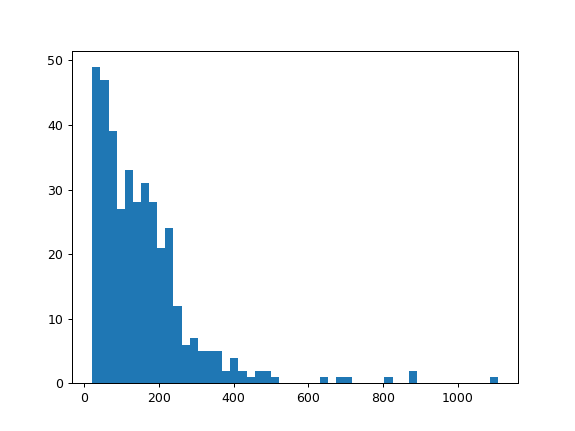

In [9]:
widest = []
for symbol in df_volume_sharesout.columns:
    temp_wide = round(df_volume_sharesout[symbol].describe()['max'], 4)
    widest.append(temp_wide)
widest = pd.Series(widest)

plt.hist(widest, 50)
plt.show()

### mins

<IPython.core.display.Javascript object>


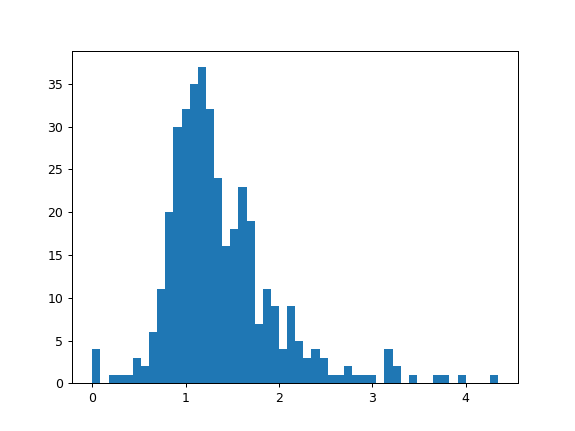

In [10]:
narrowest = []
for symbol in df_volume_sharesout.columns:
    temp_narrow = round(df_volume_sharesout[symbol].describe()['min'], 4)
    narrowest.append(temp_narrow)
narrowest = pd.Series(narrowest)

plt.hist(narrowest, 50)
plt.show()

### Plot Histograms









Batch 0


<IPython.core.display.Javascript object>


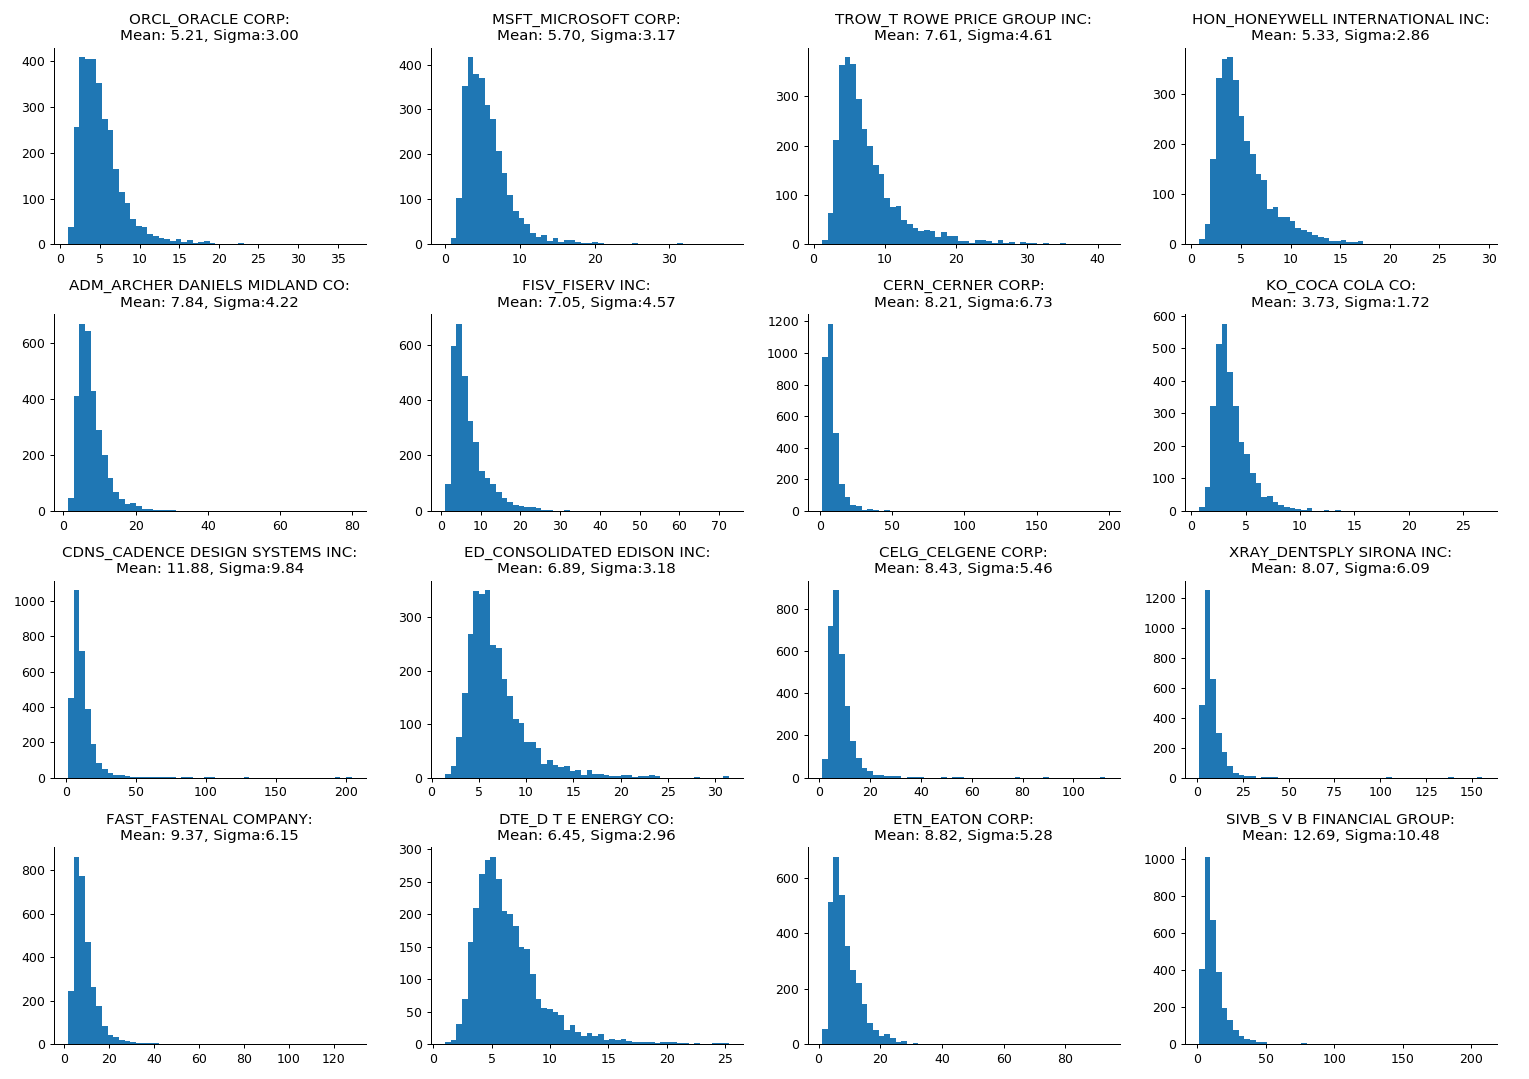









Batch 1


<IPython.core.display.Javascript object>


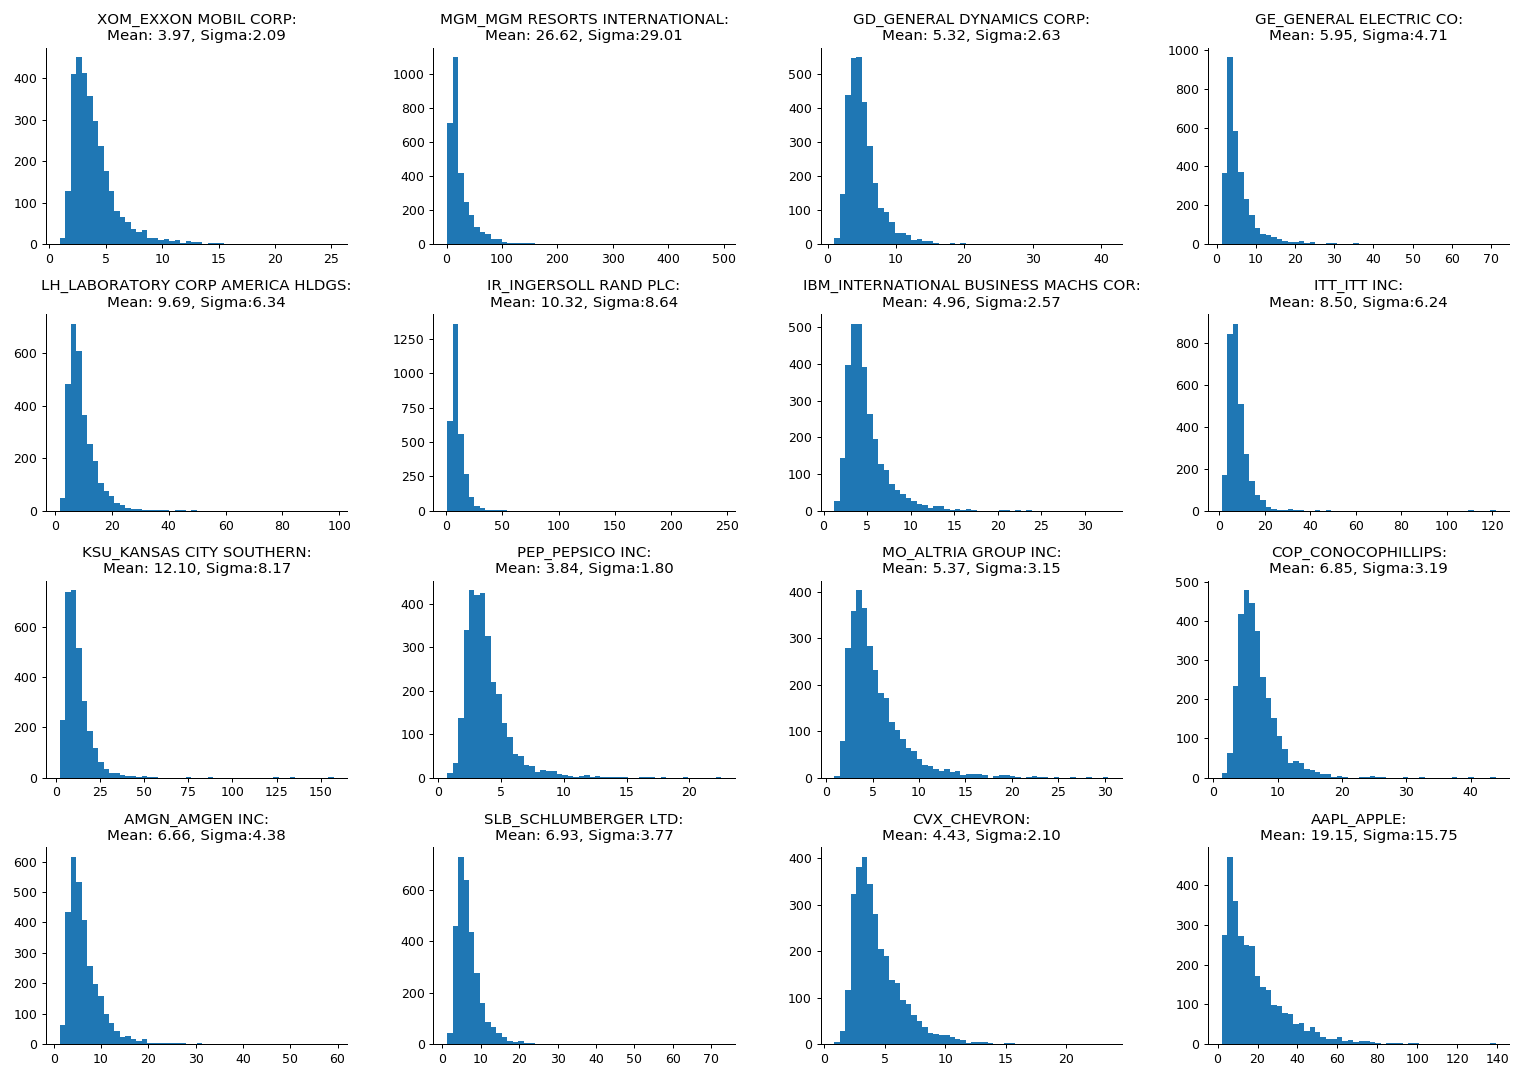









Batch 2


<IPython.core.display.Javascript object>


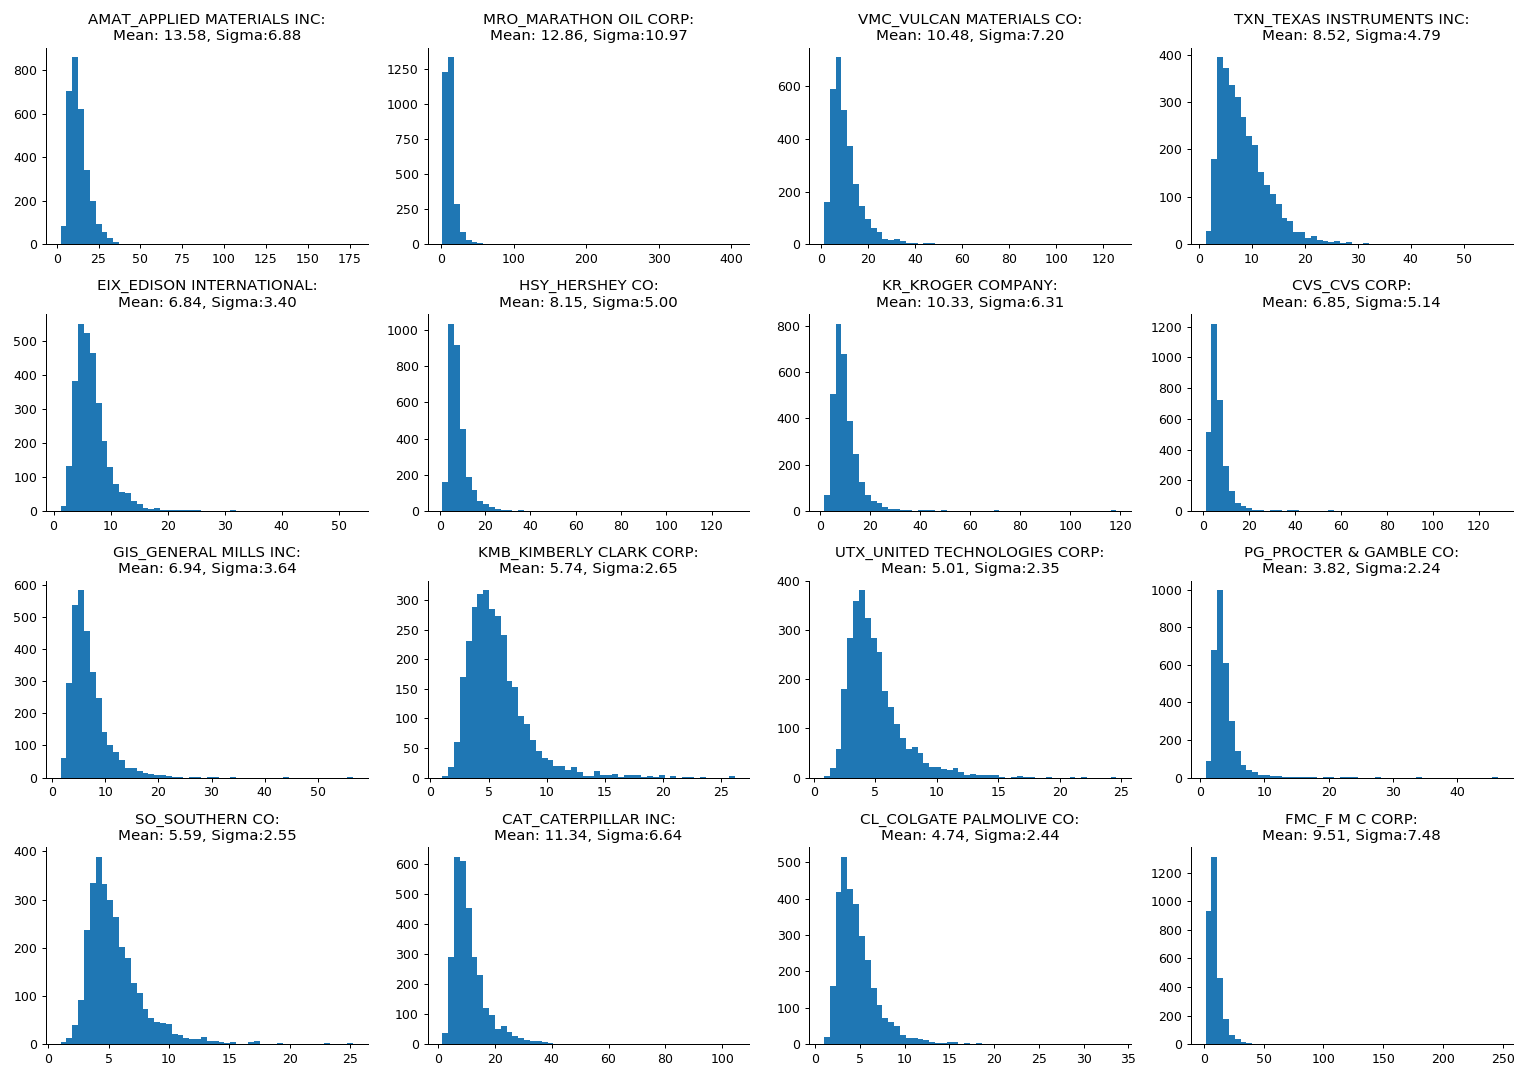









Batch 3


<IPython.core.display.Javascript object>


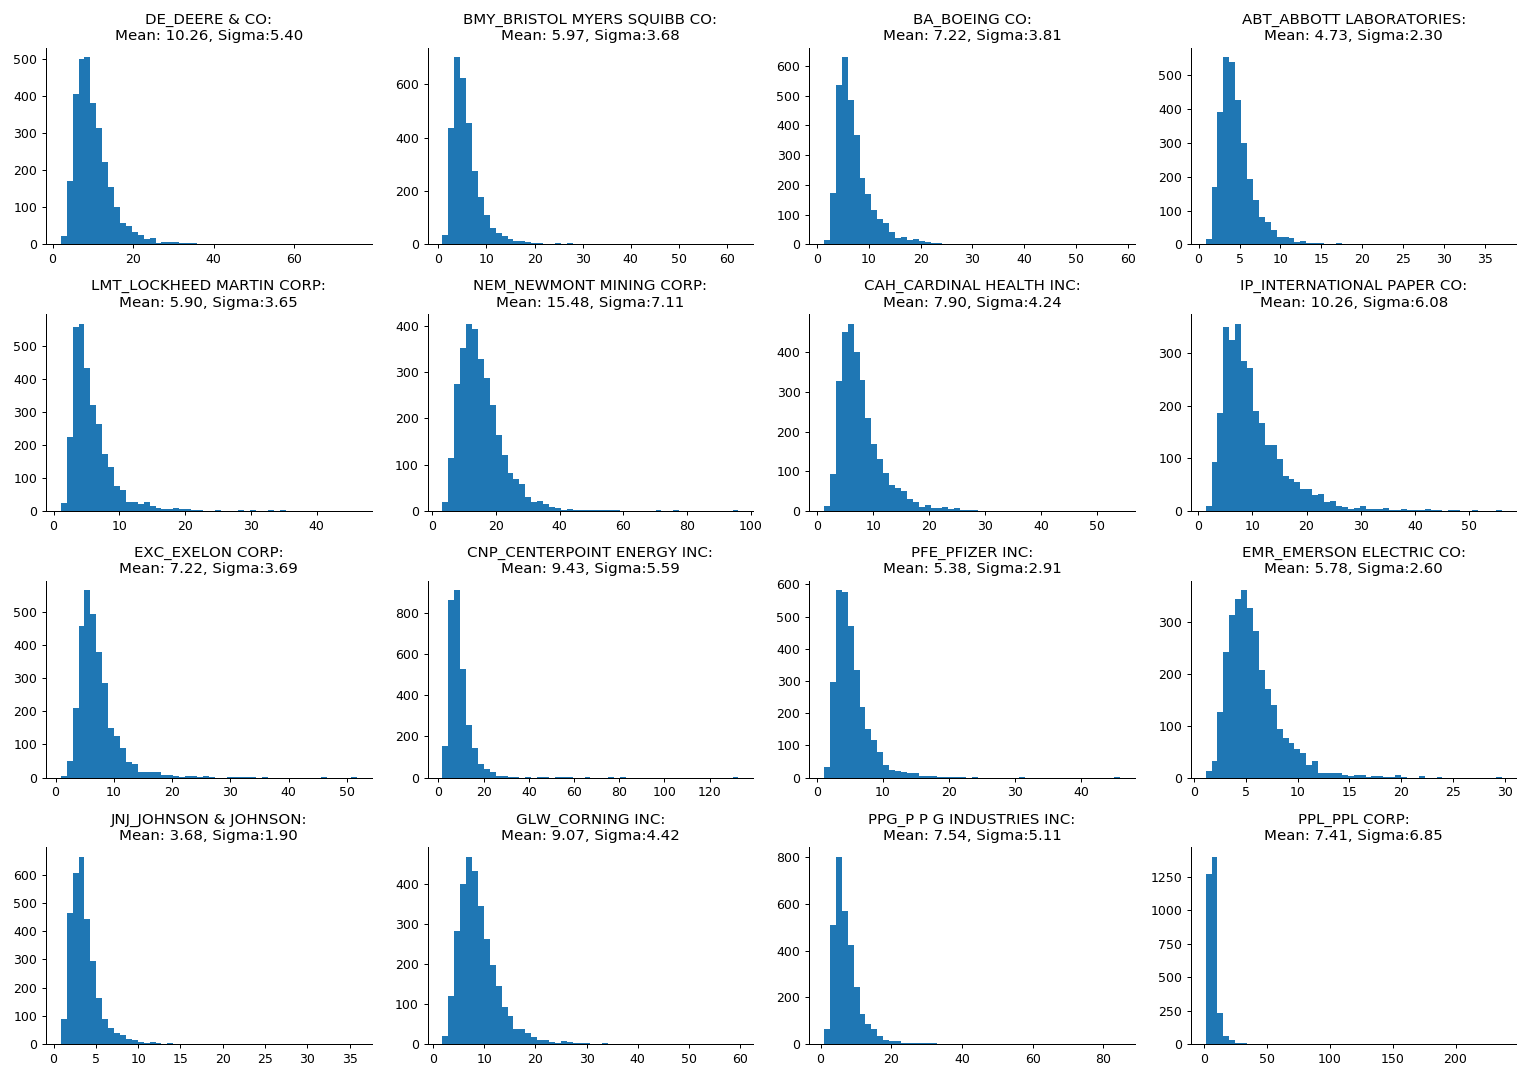









Batch 4


<IPython.core.display.Javascript object>


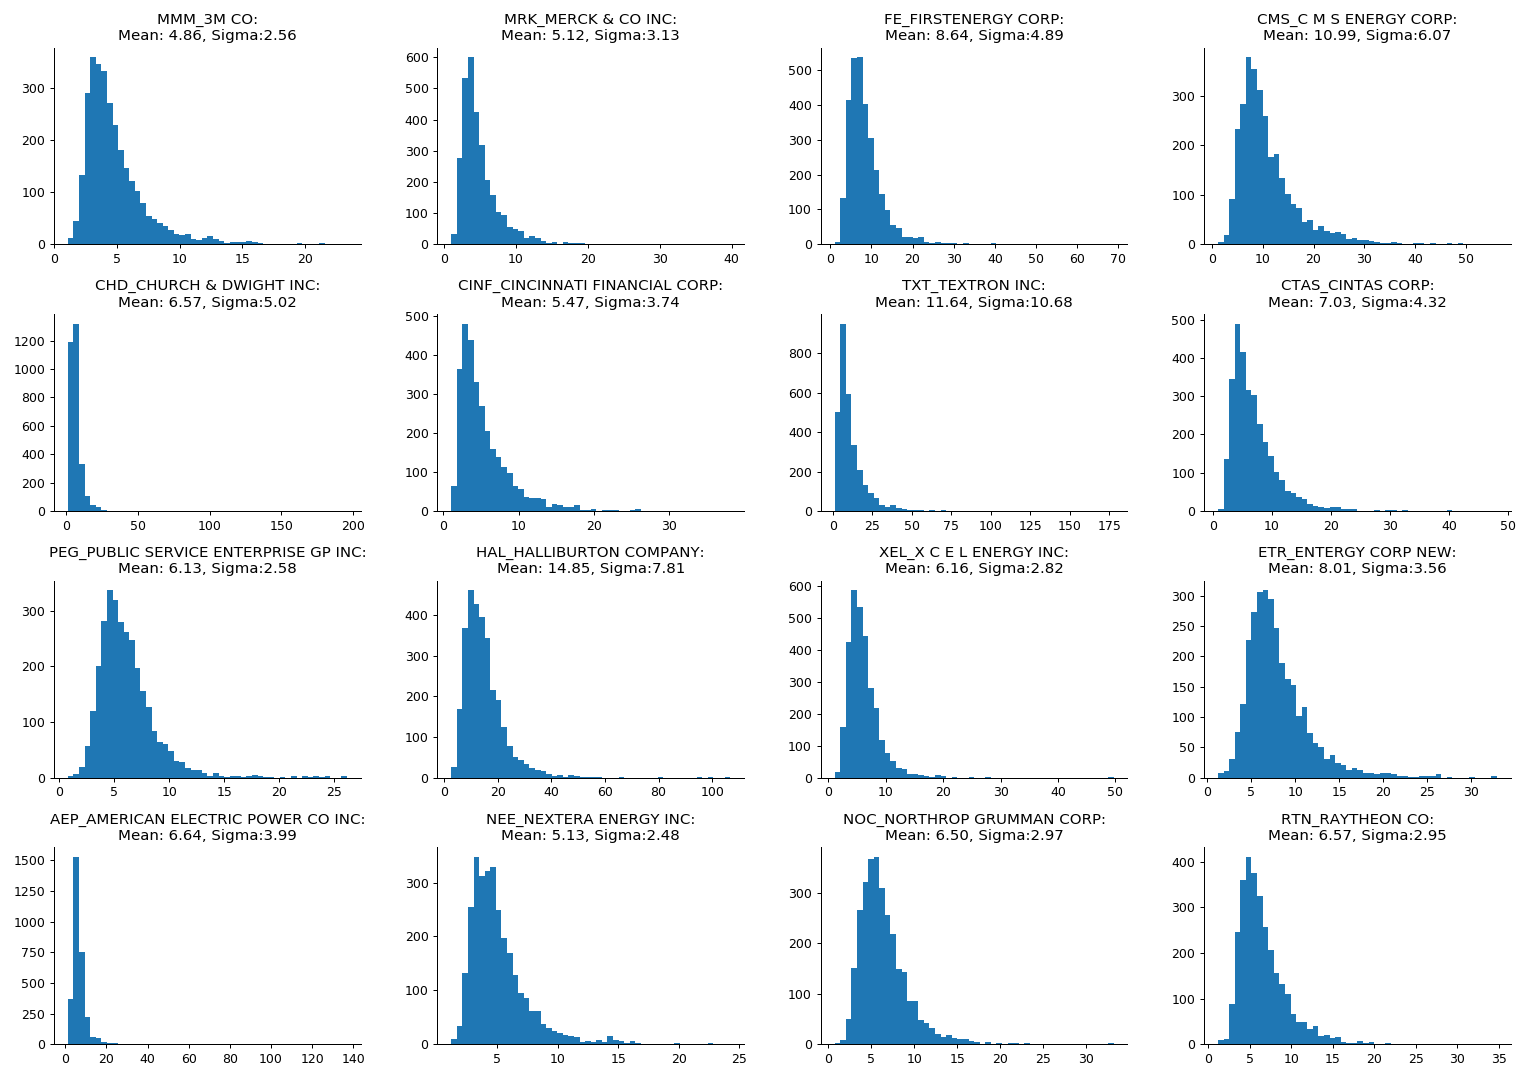









Batch 5


<IPython.core.display.Javascript object>


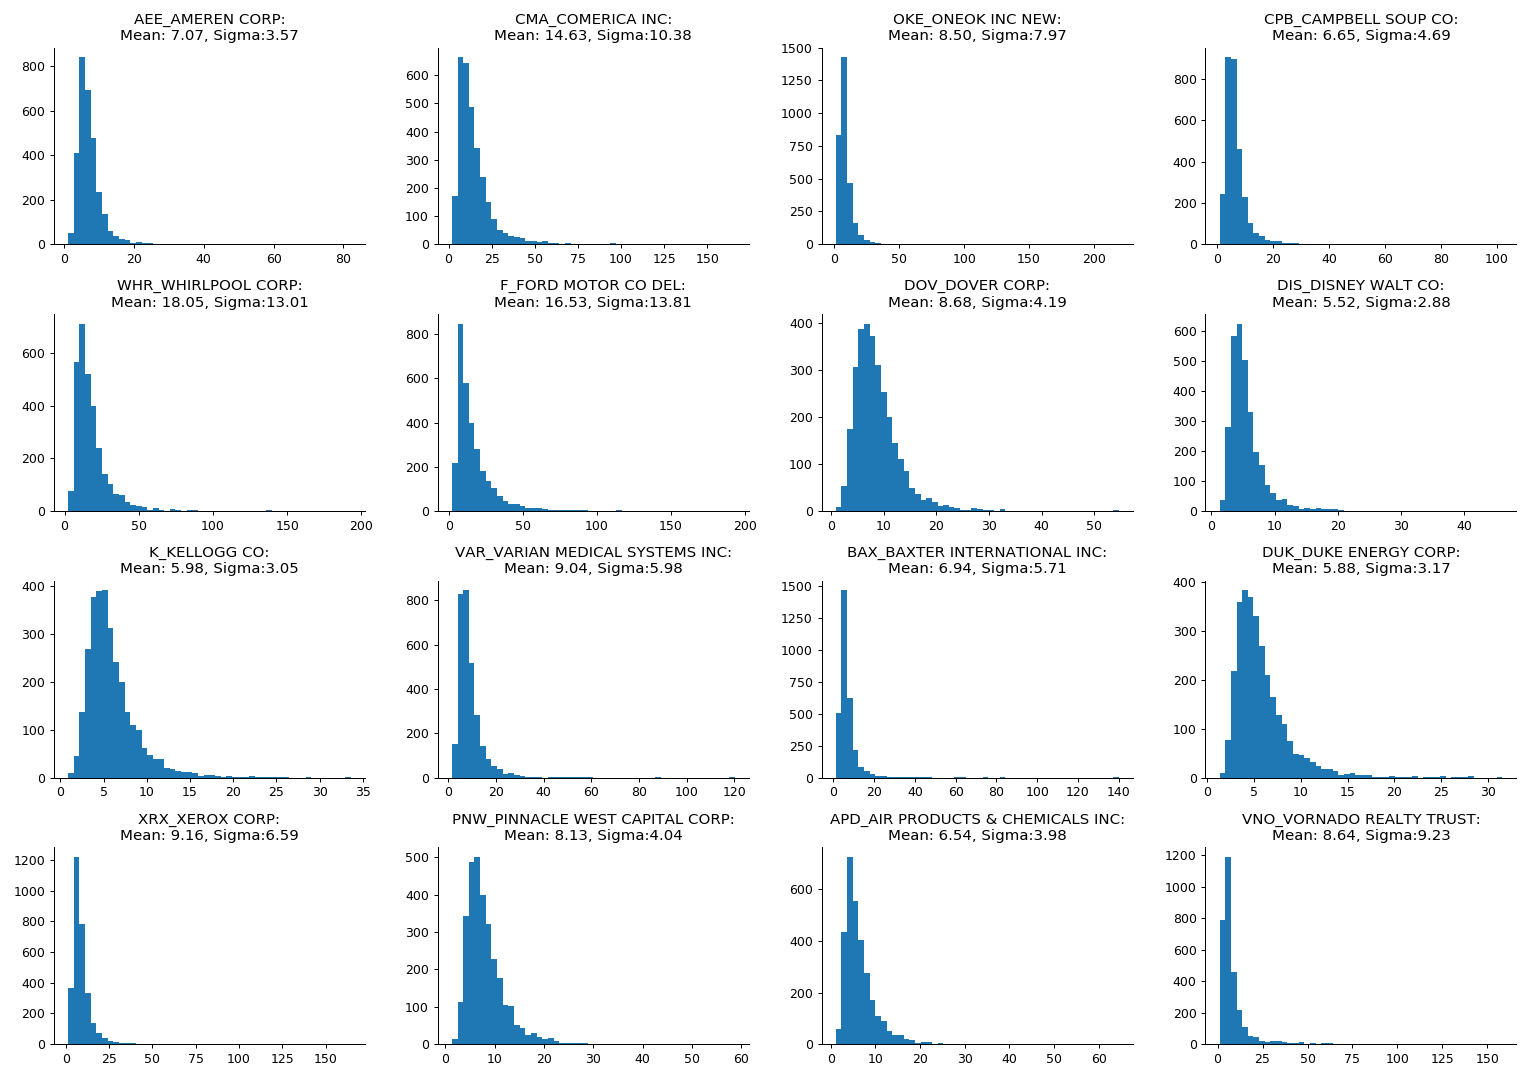









Batch 6


<IPython.core.display.Javascript object>


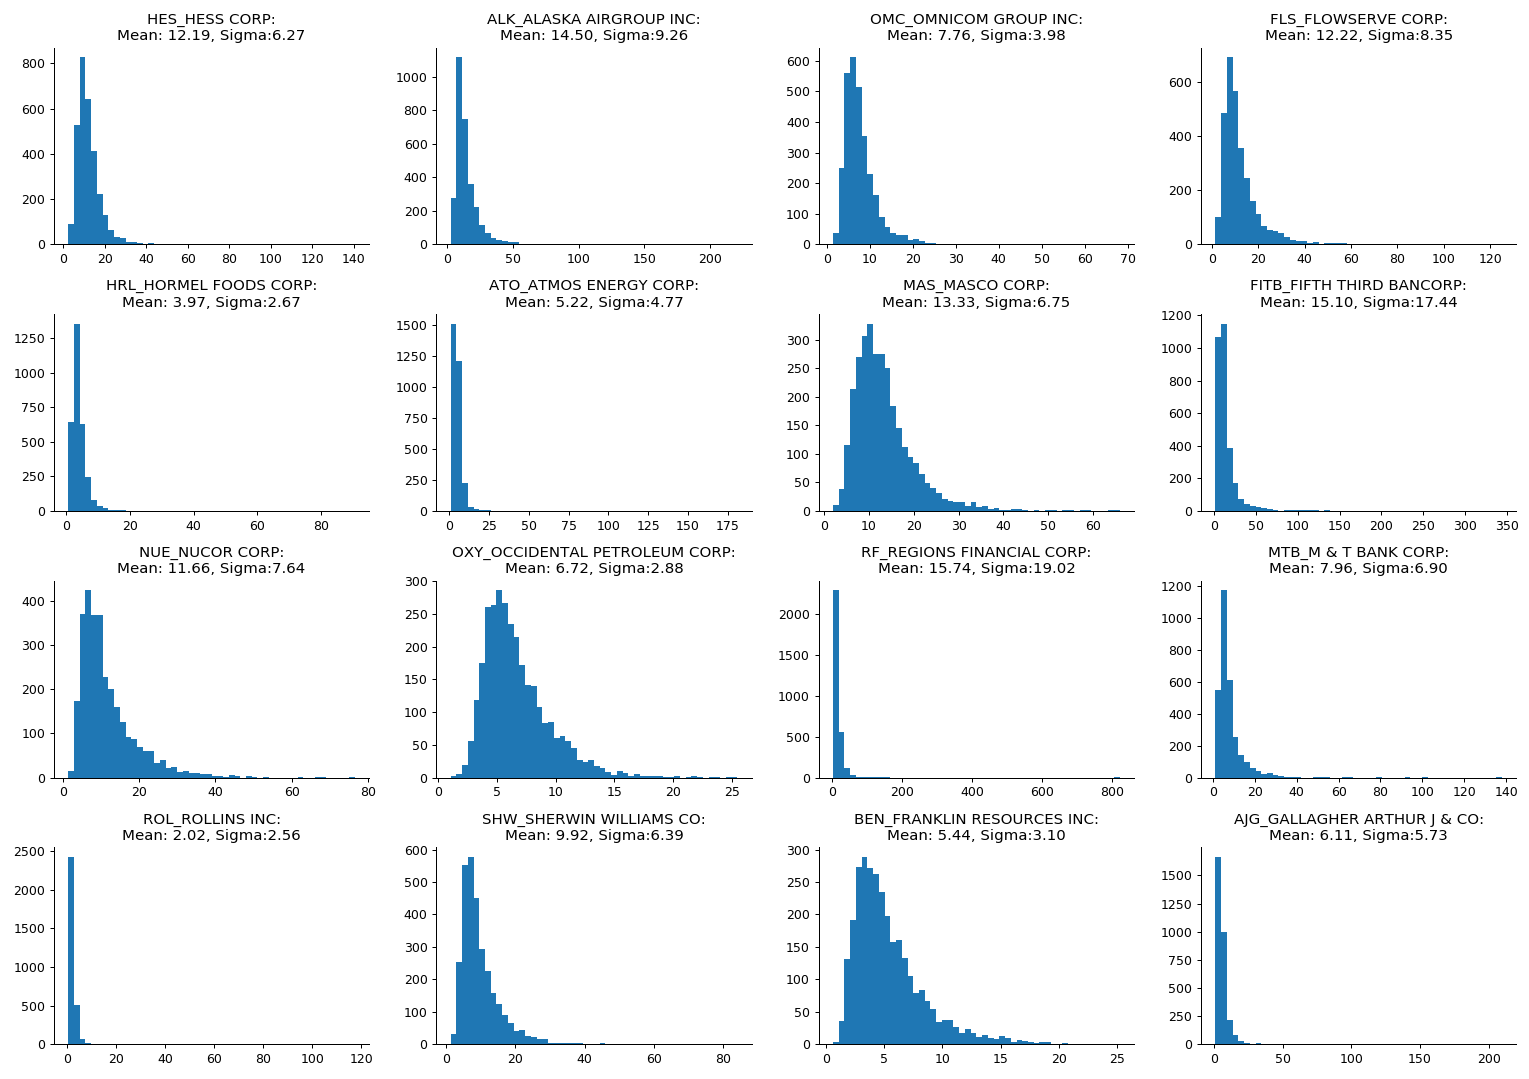









Batch 7


<IPython.core.display.Javascript object>


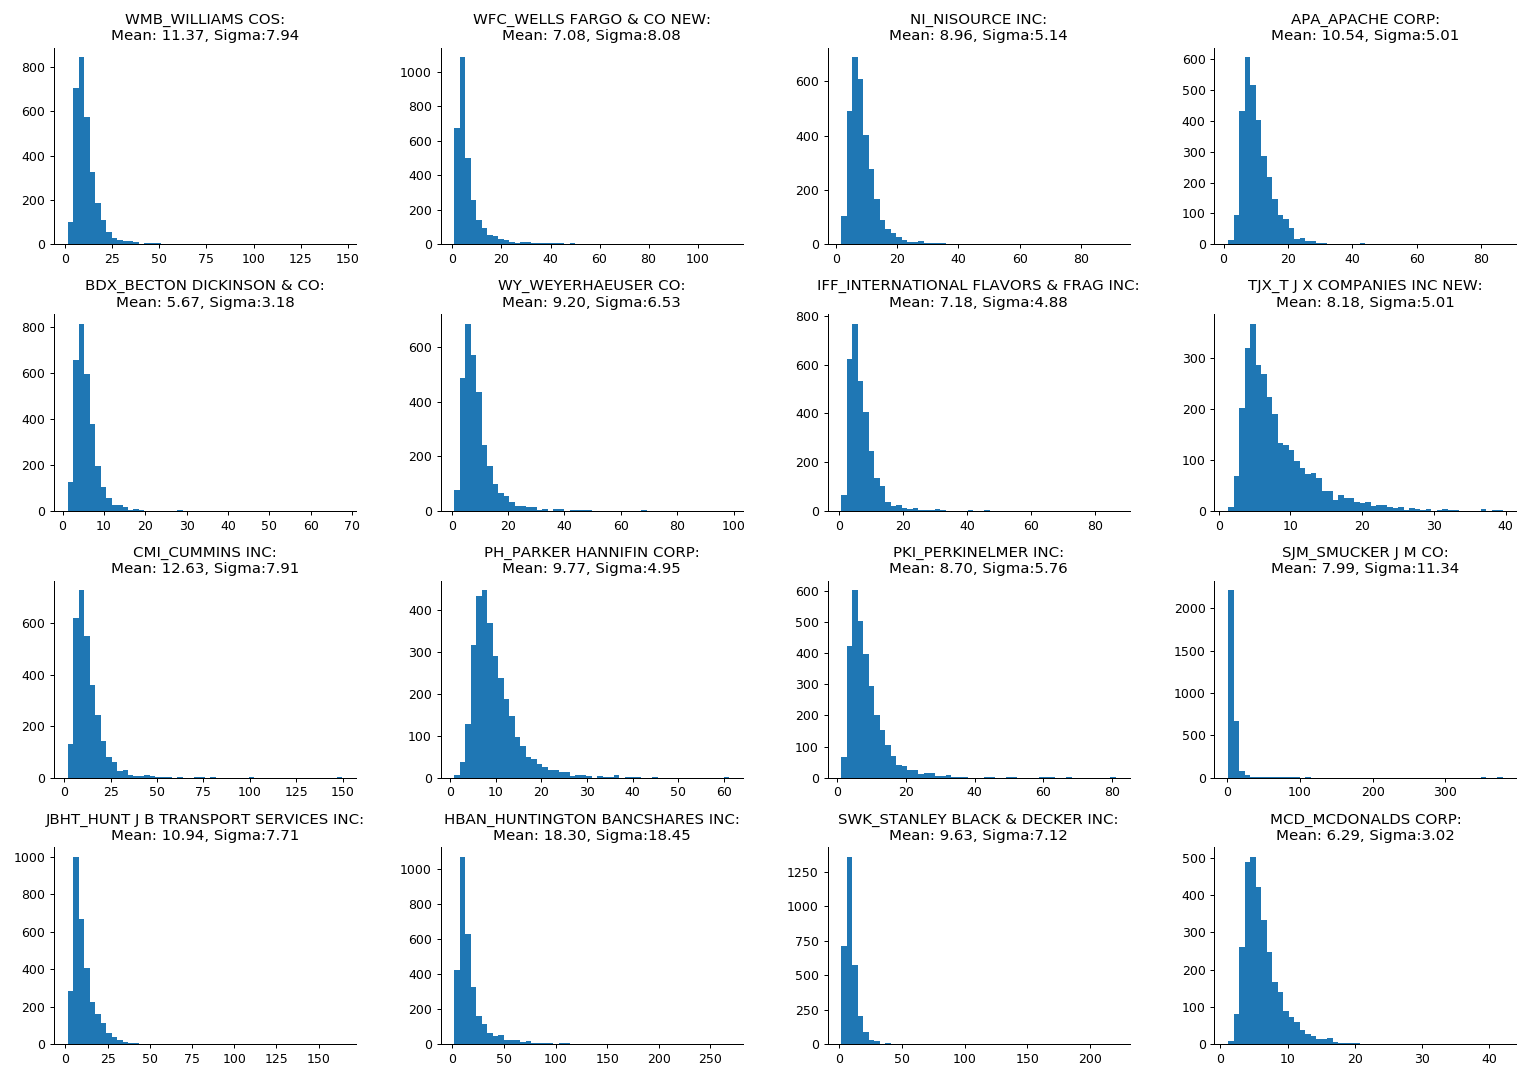









Batch 8


<IPython.core.display.Javascript object>


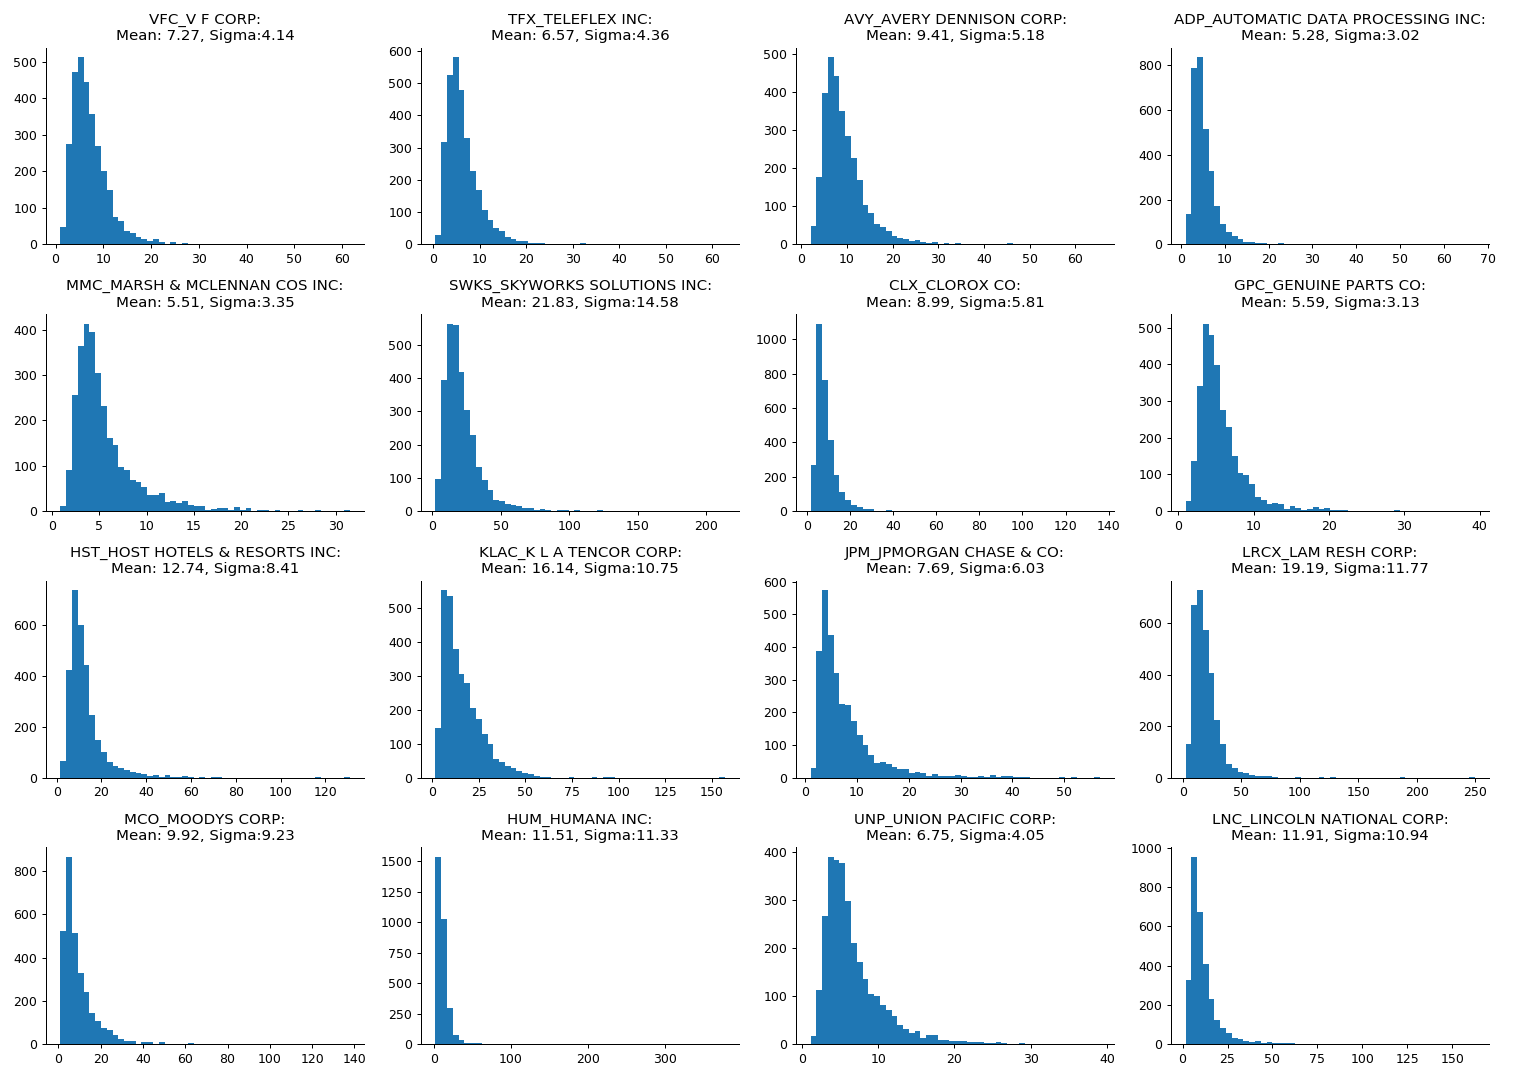









Batch 9


<IPython.core.display.Javascript object>


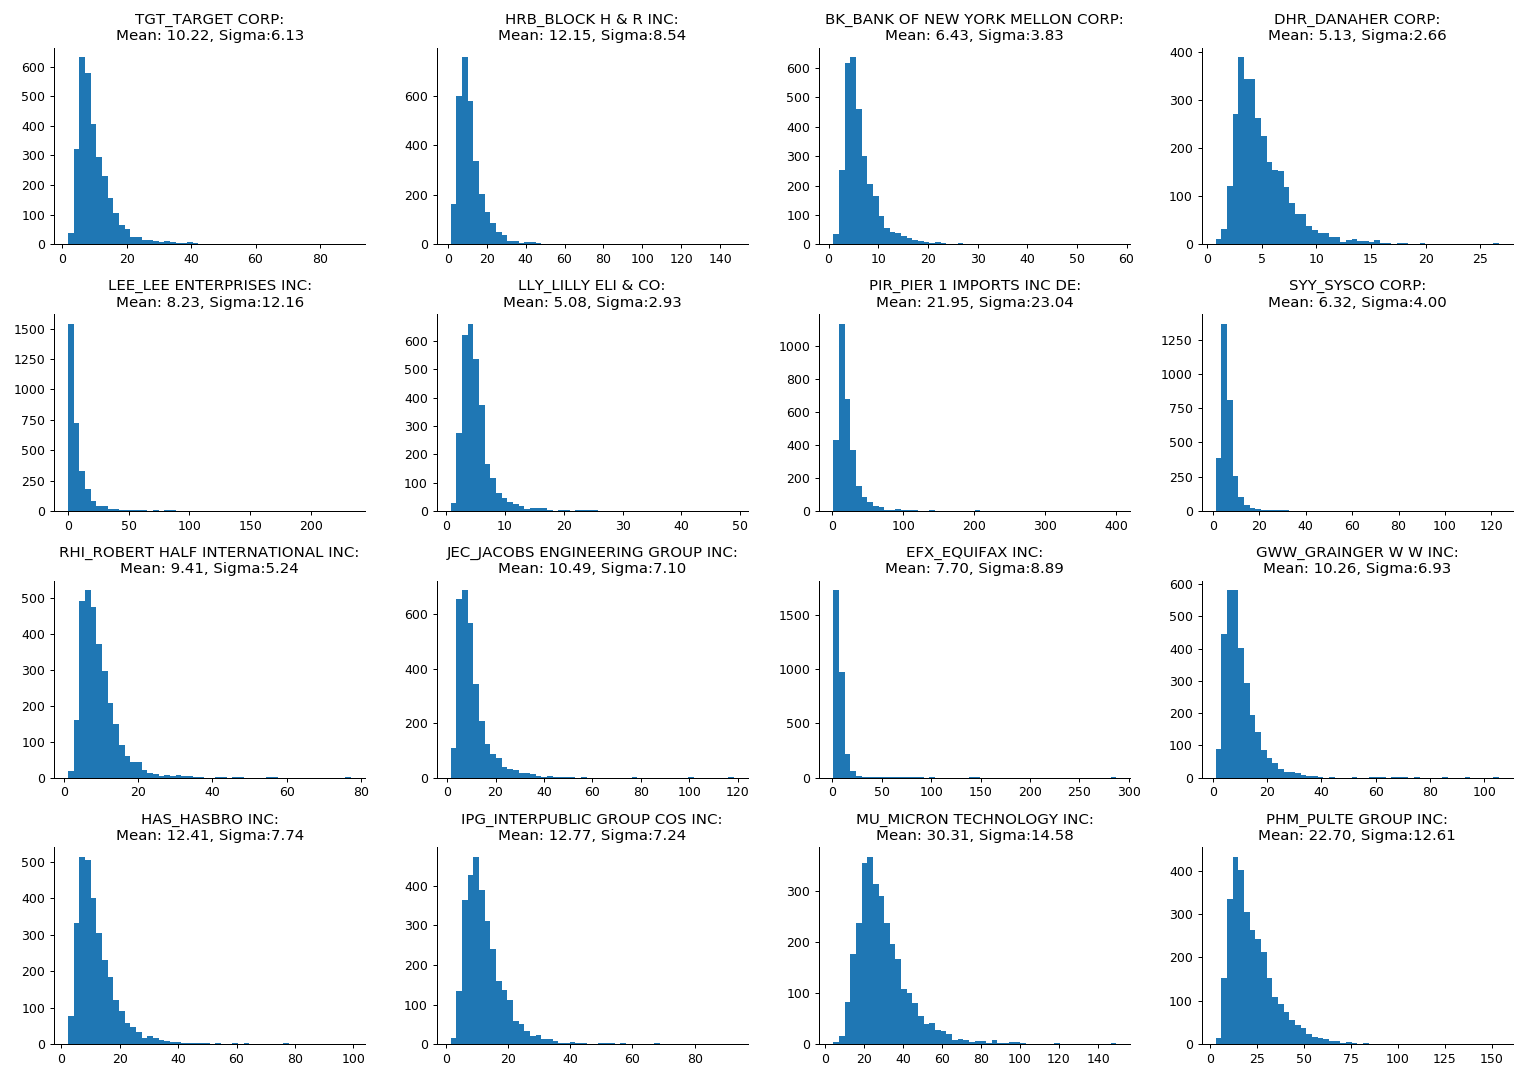









Batch 10


<IPython.core.display.Javascript object>


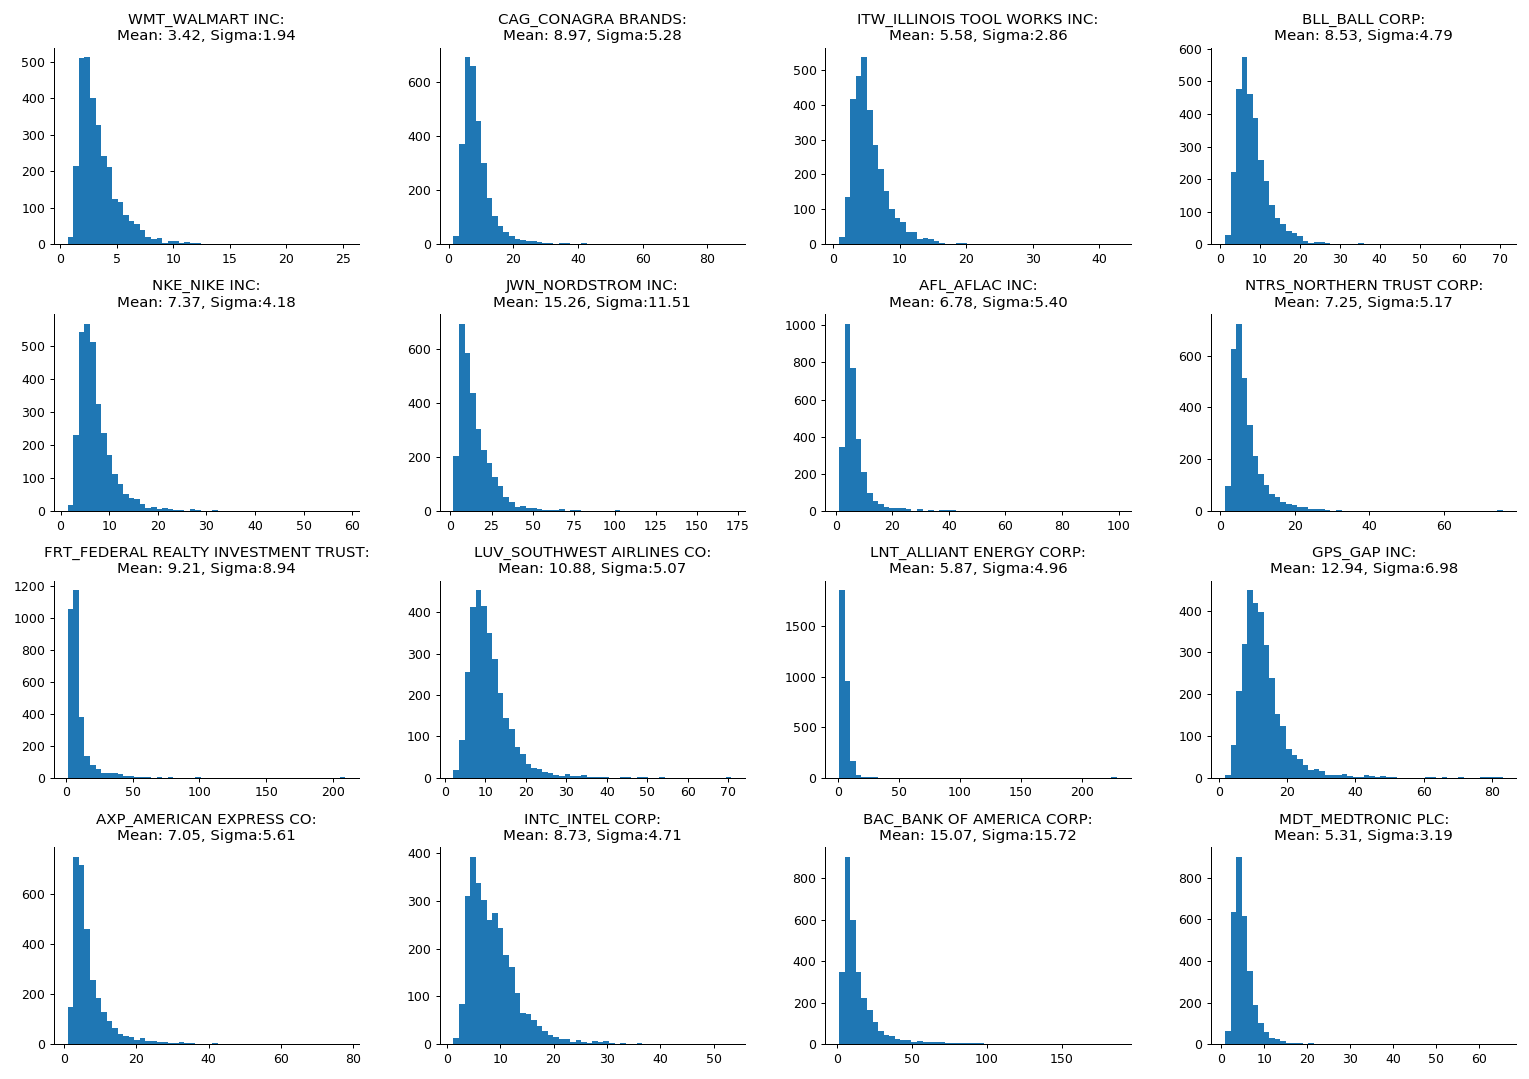









Batch 11


<IPython.core.display.Javascript object>


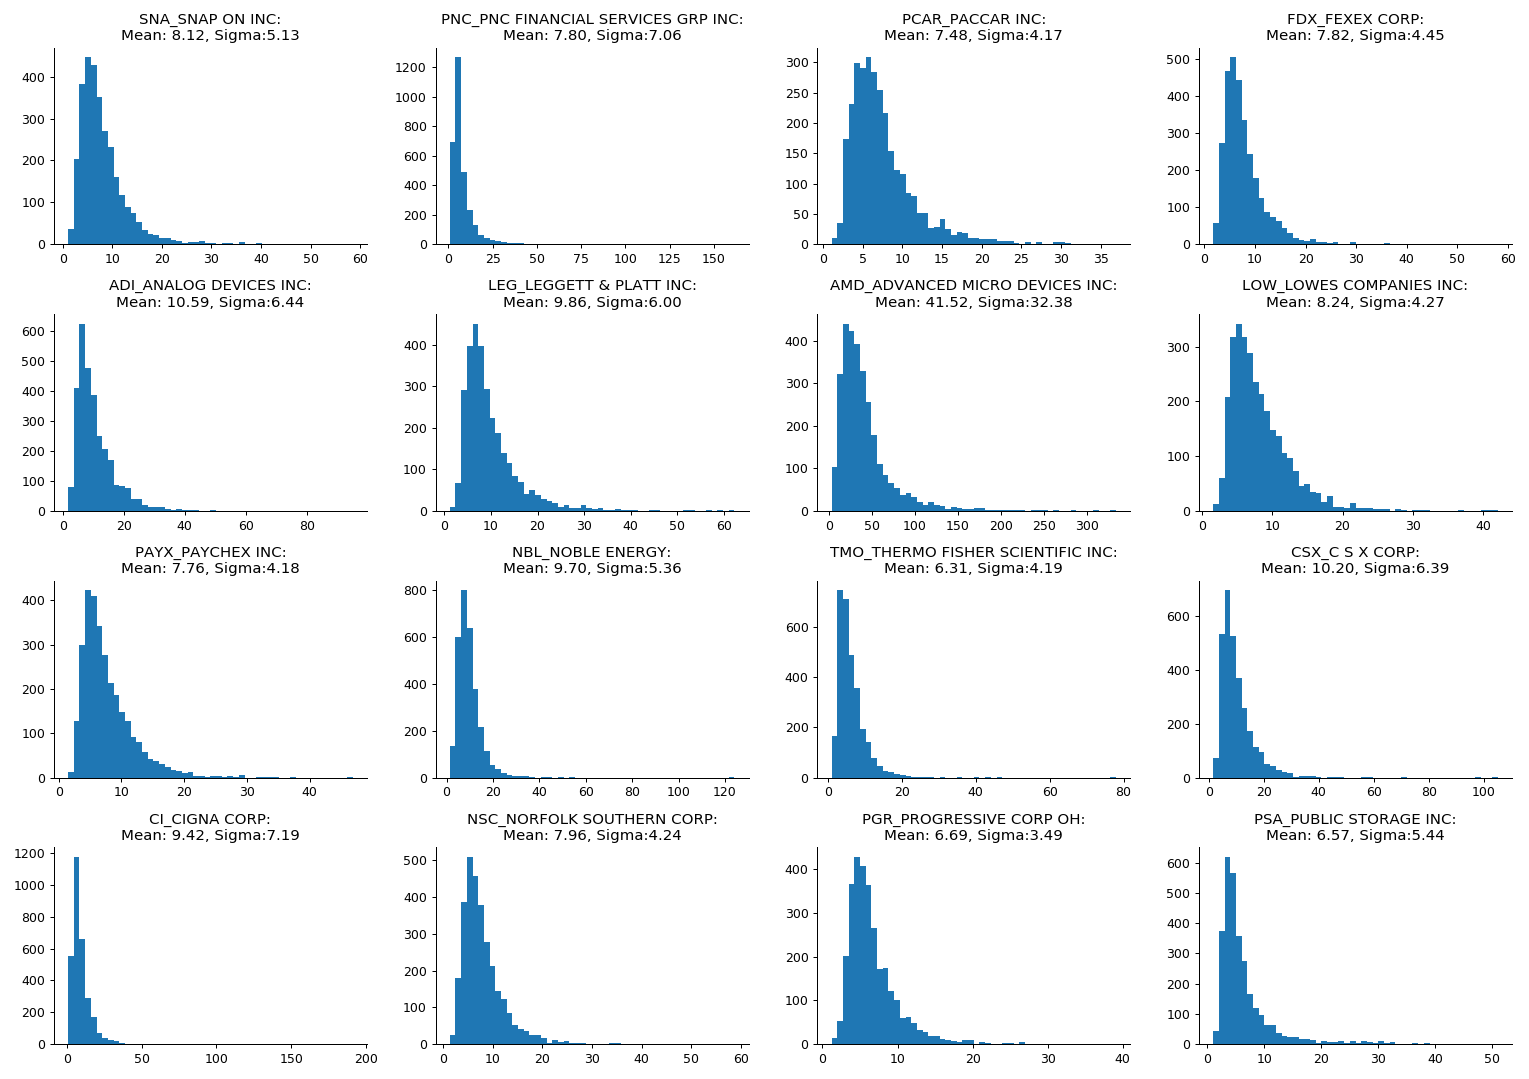









Batch 12


<IPython.core.display.Javascript object>


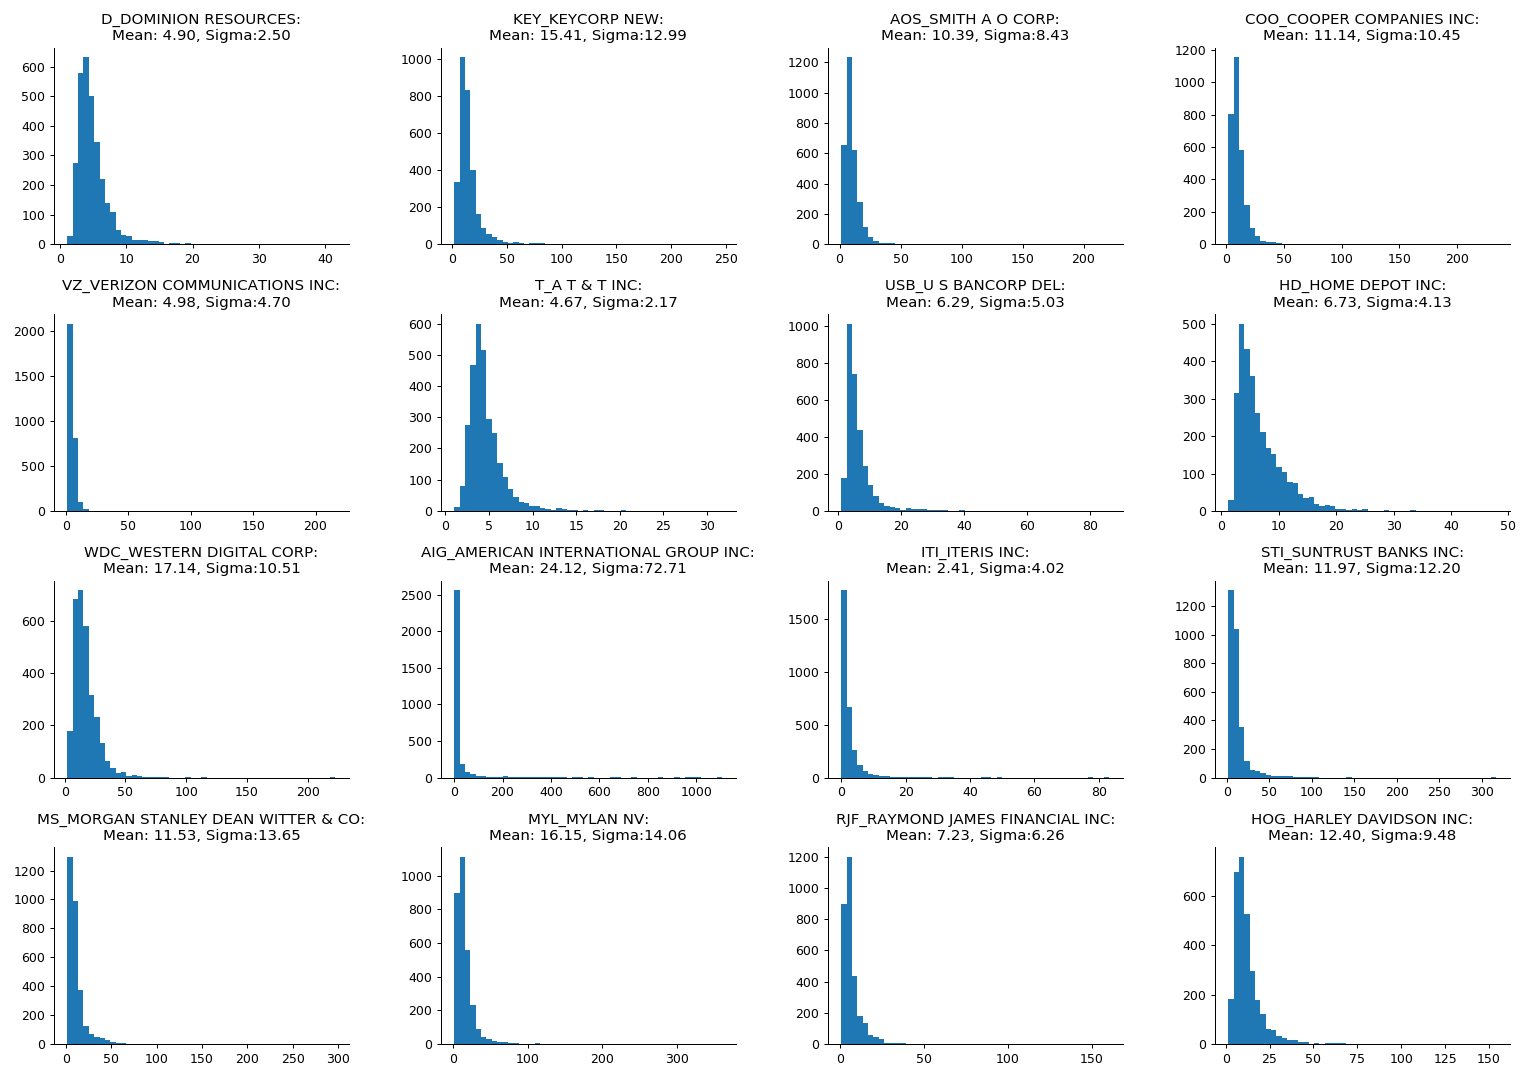









Batch 13


<IPython.core.display.Javascript object>


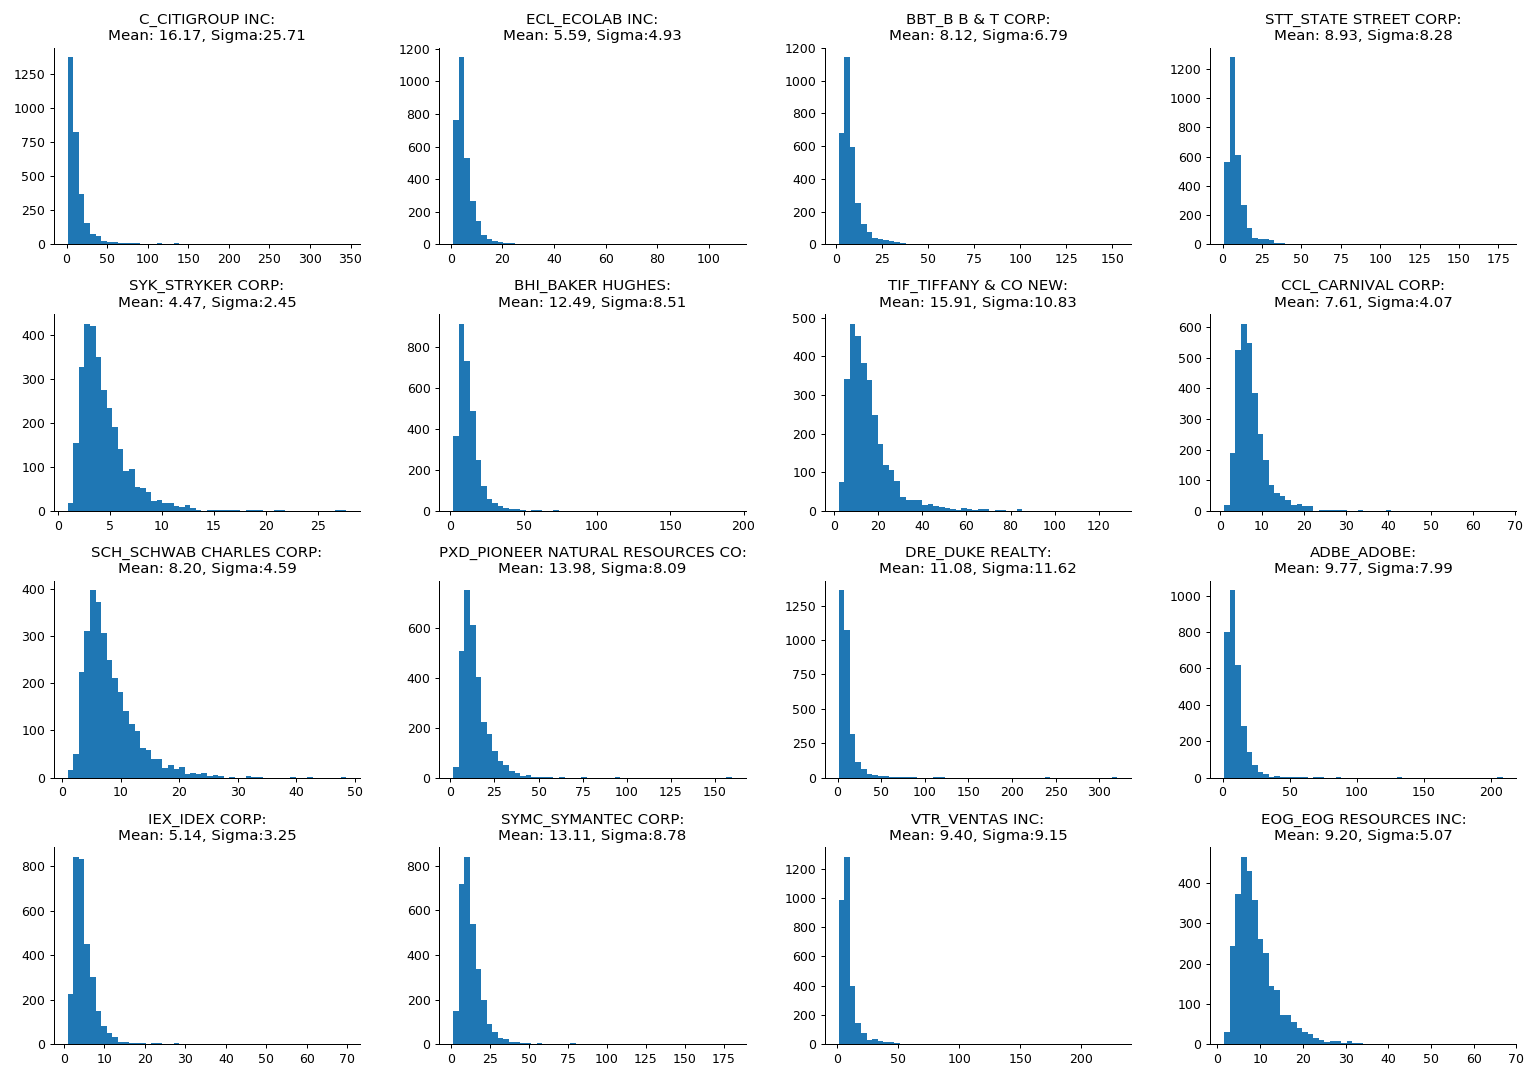

C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\PROGRA1\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)










Batch 14


<IPython.core.display.Javascript object>


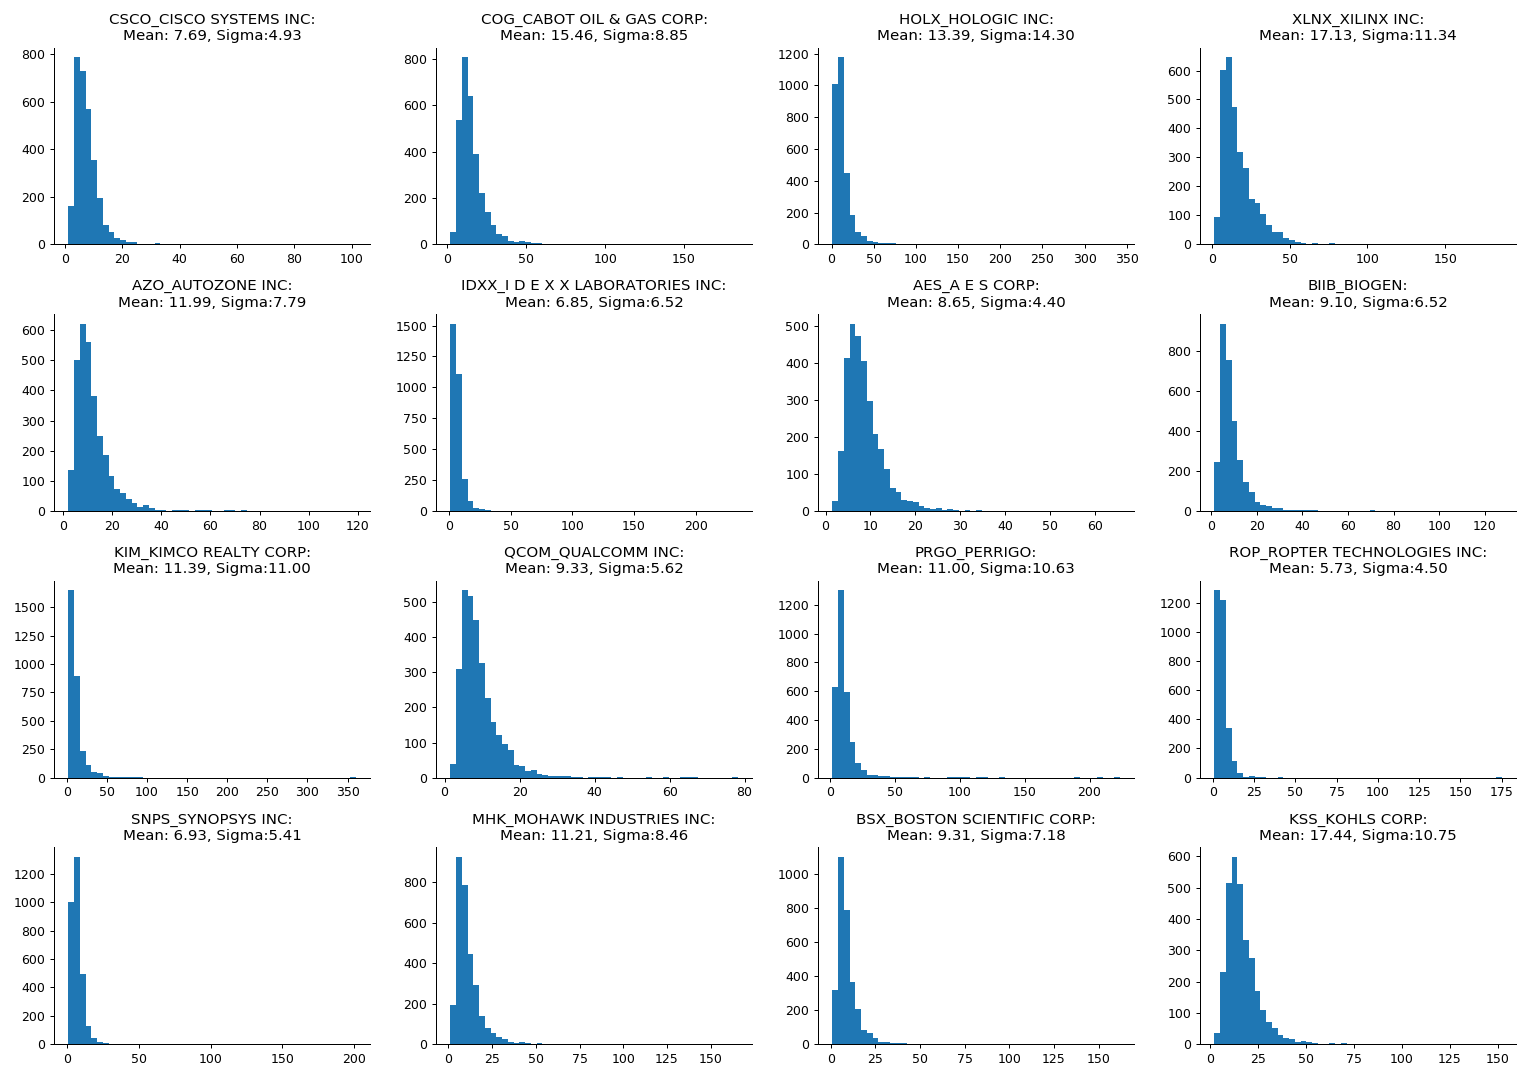









Batch 15


<IPython.core.display.Javascript object>


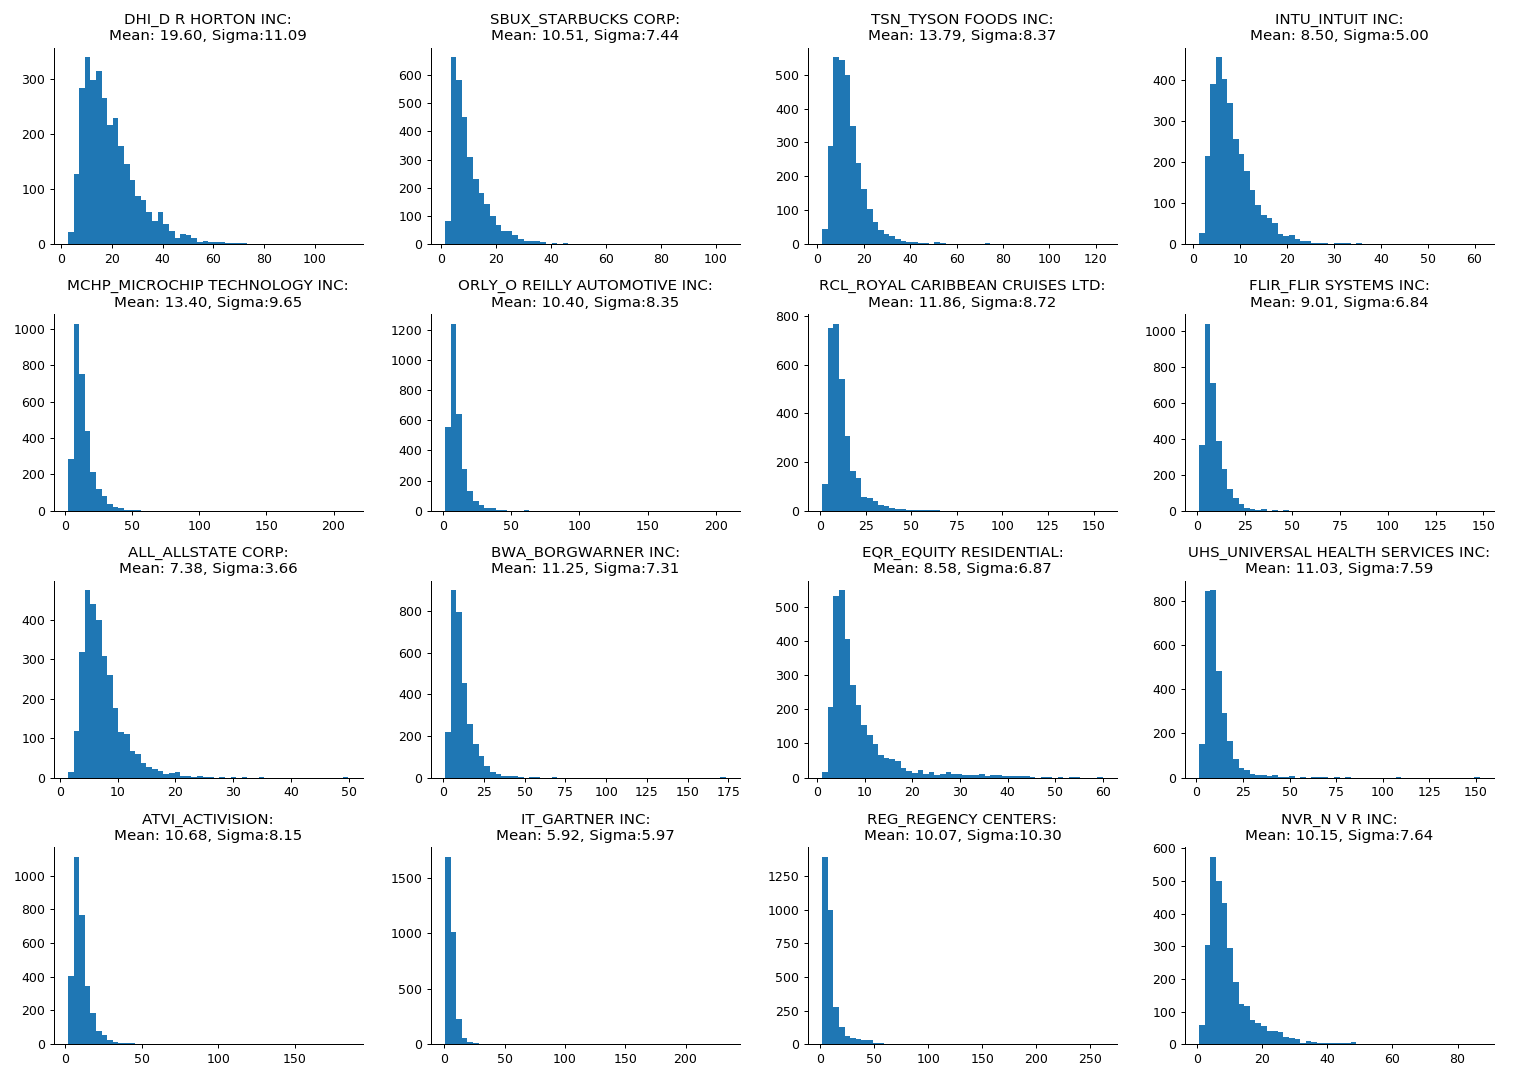









Batch 16


<IPython.core.display.Javascript object>


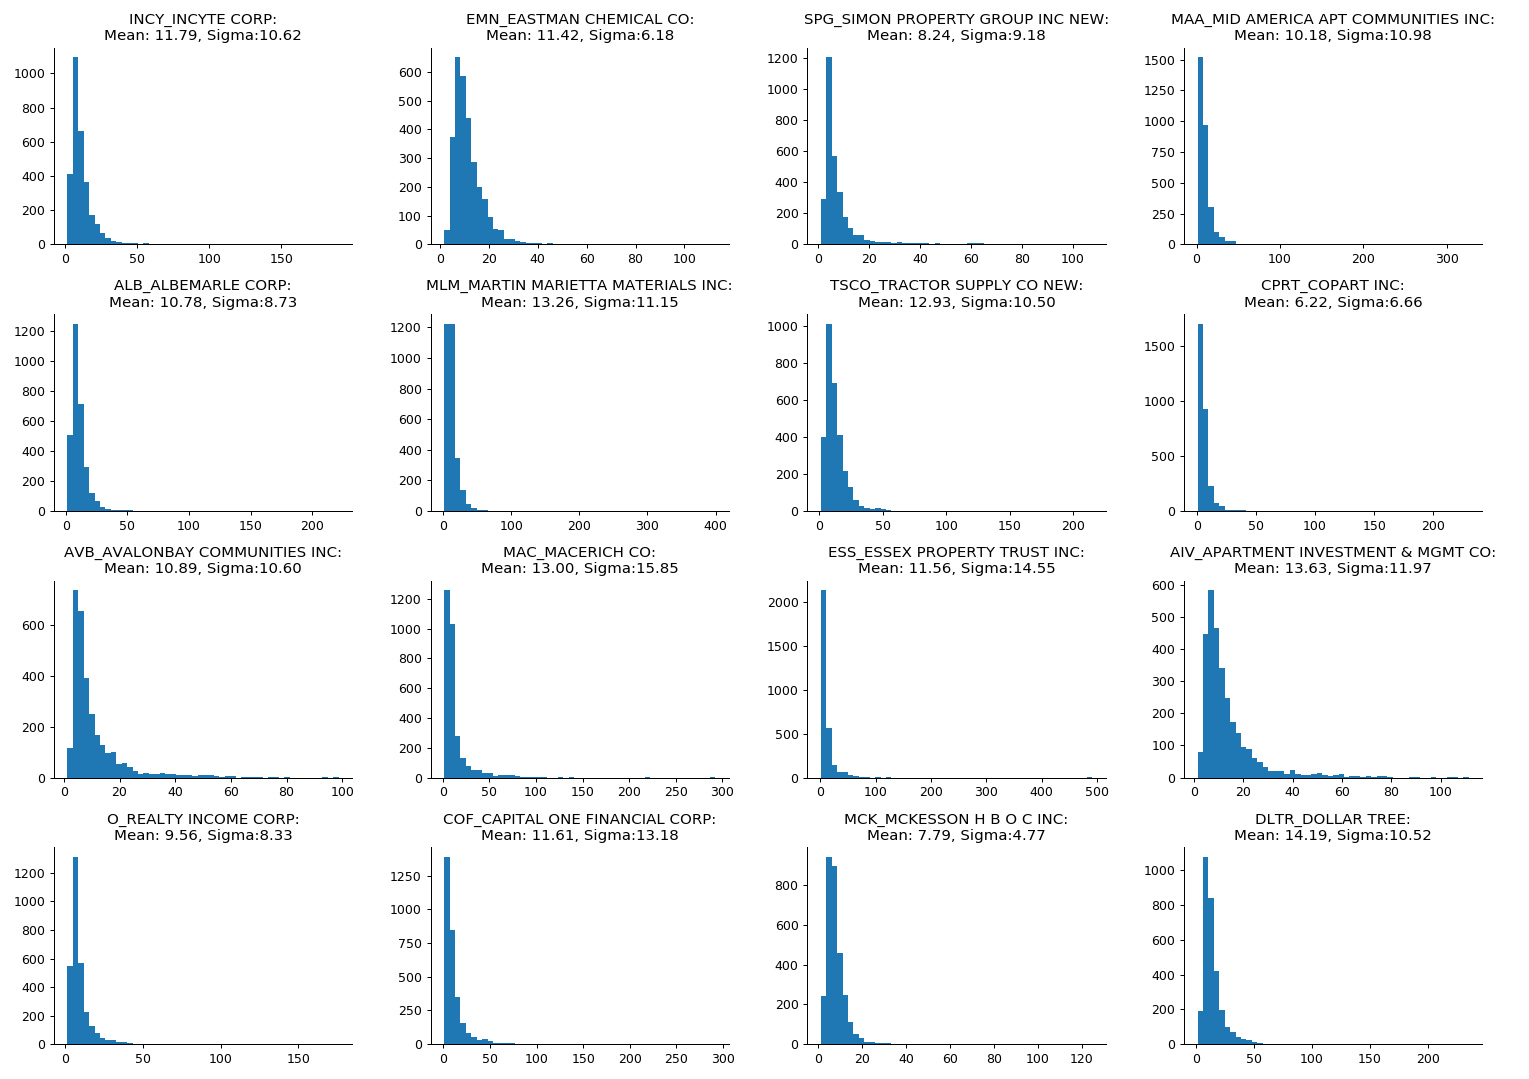









Batch 17


<IPython.core.display.Javascript object>


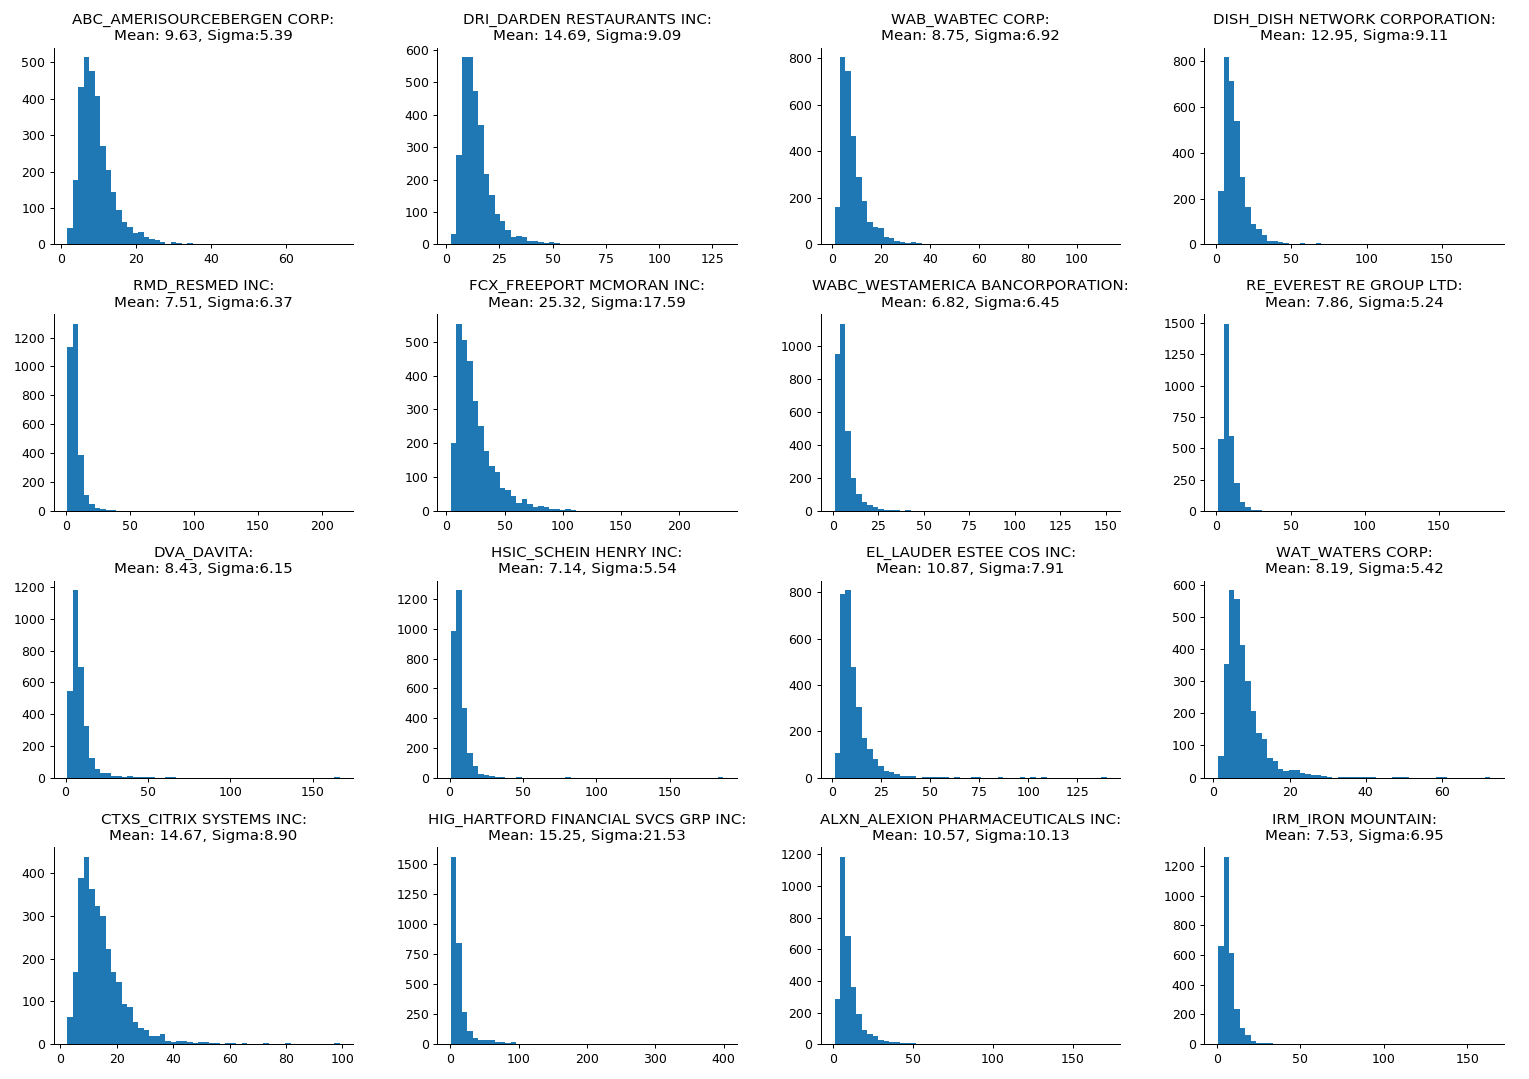









Batch 18


<IPython.core.display.Javascript object>


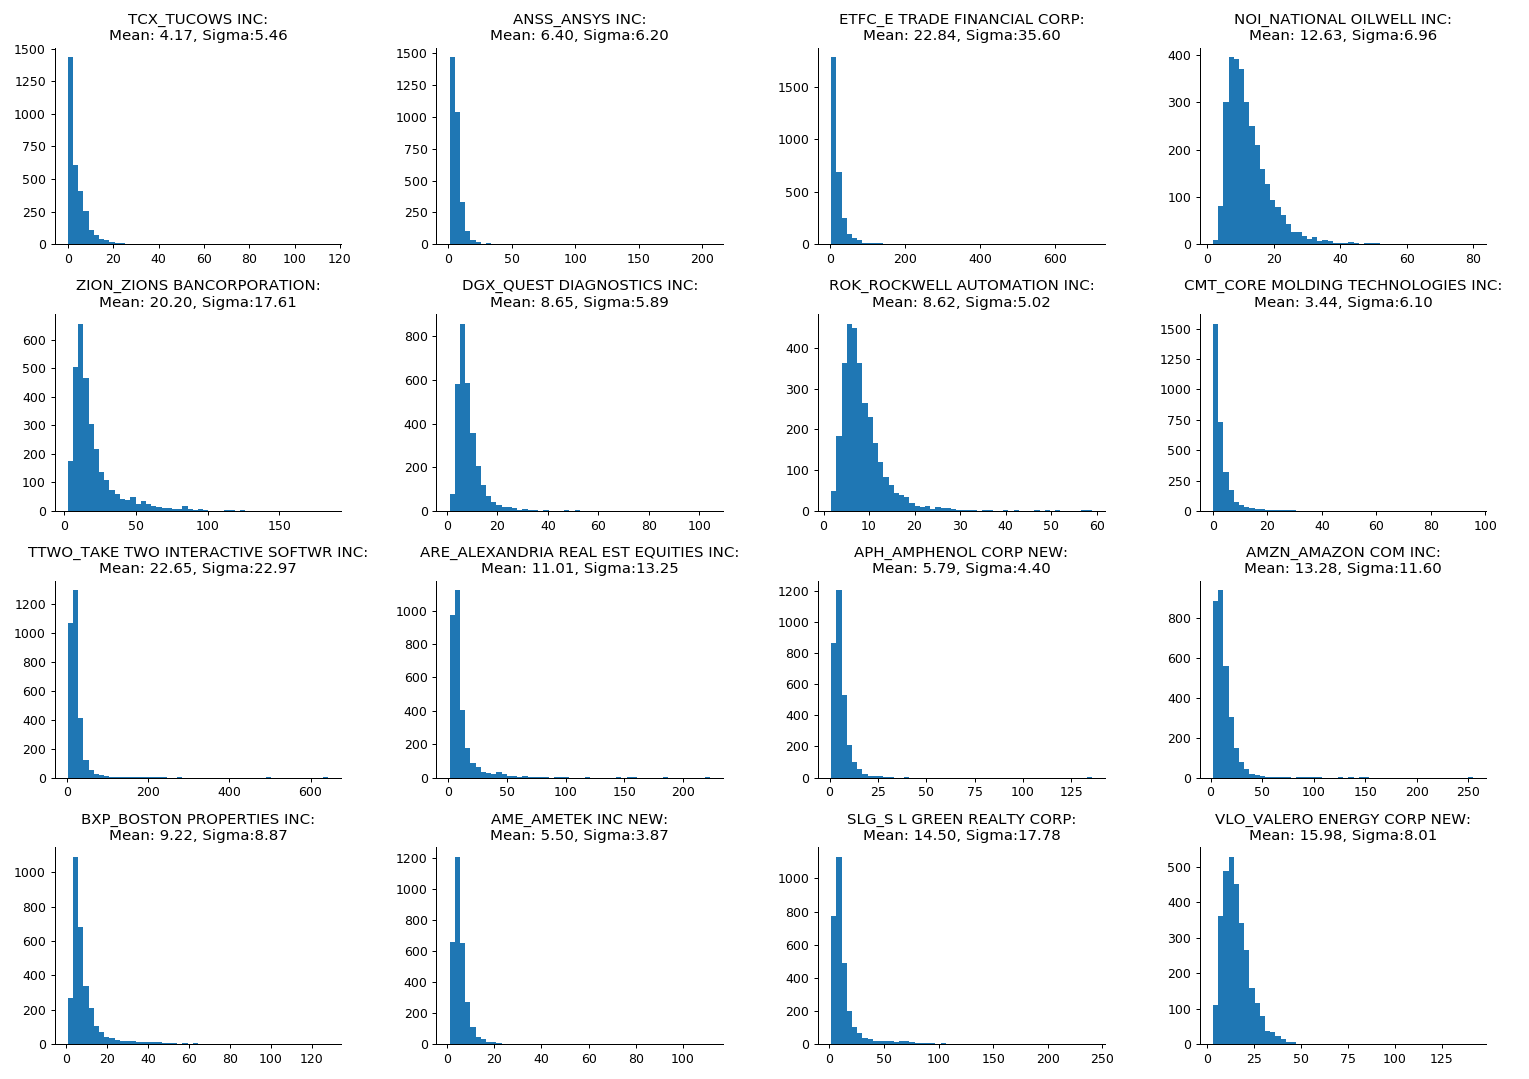









Batch 19


<IPython.core.display.Javascript object>


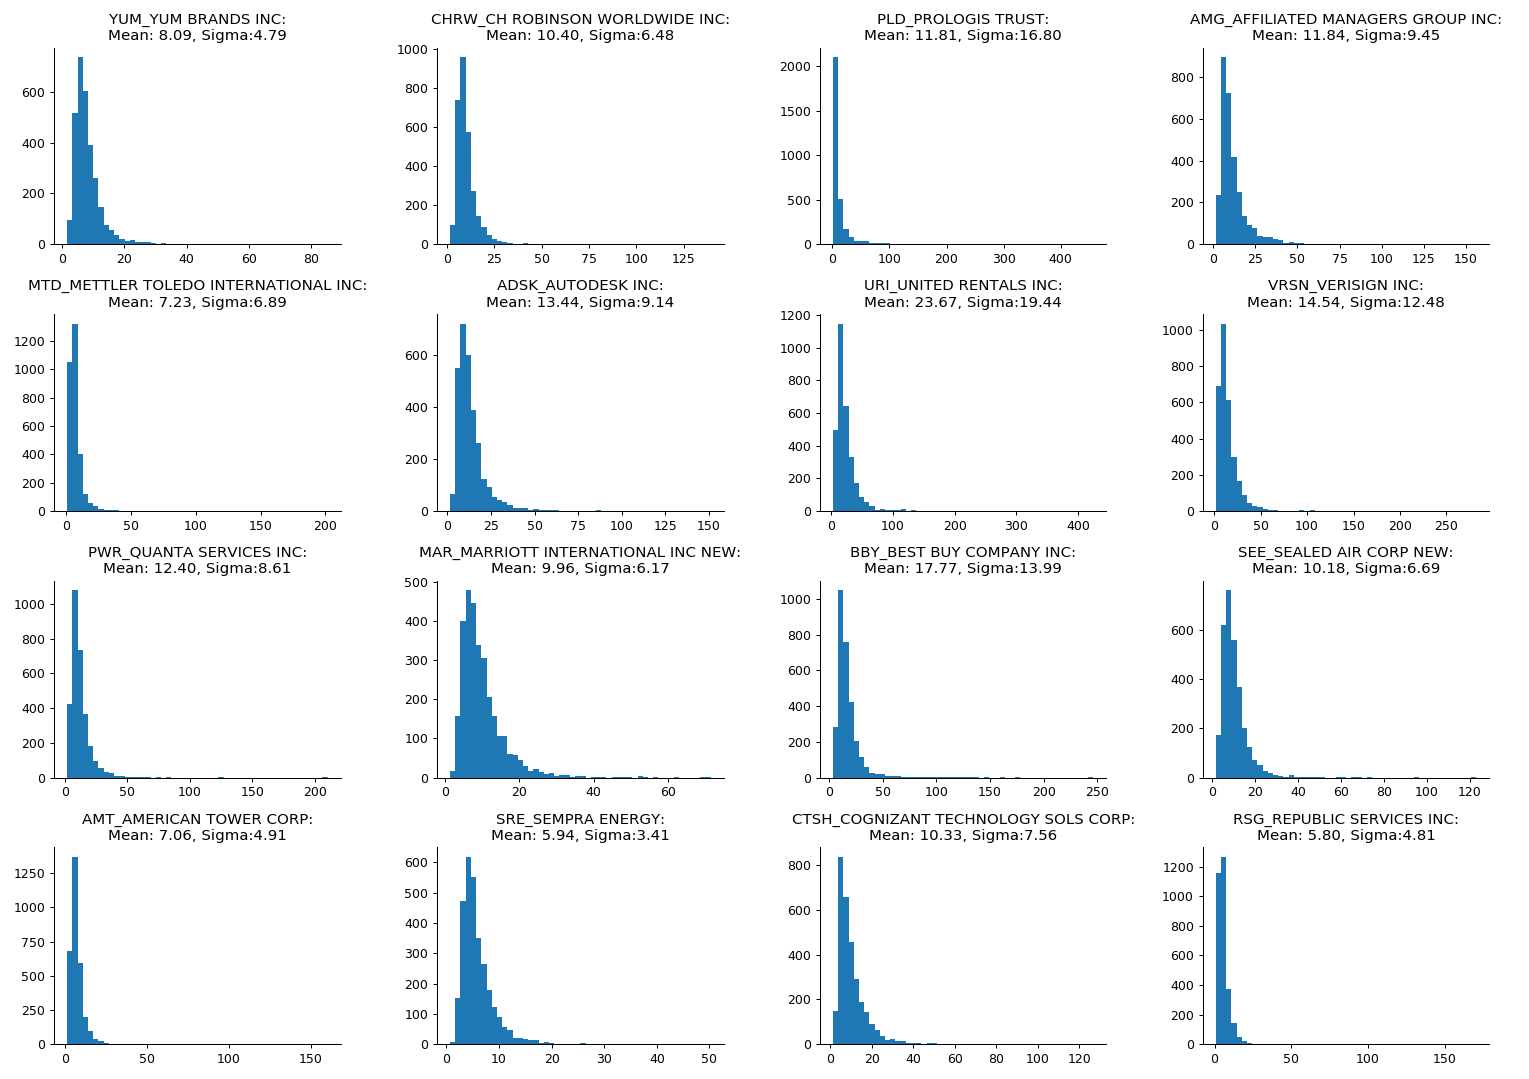









Batch 20


C:\PROGRA1\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


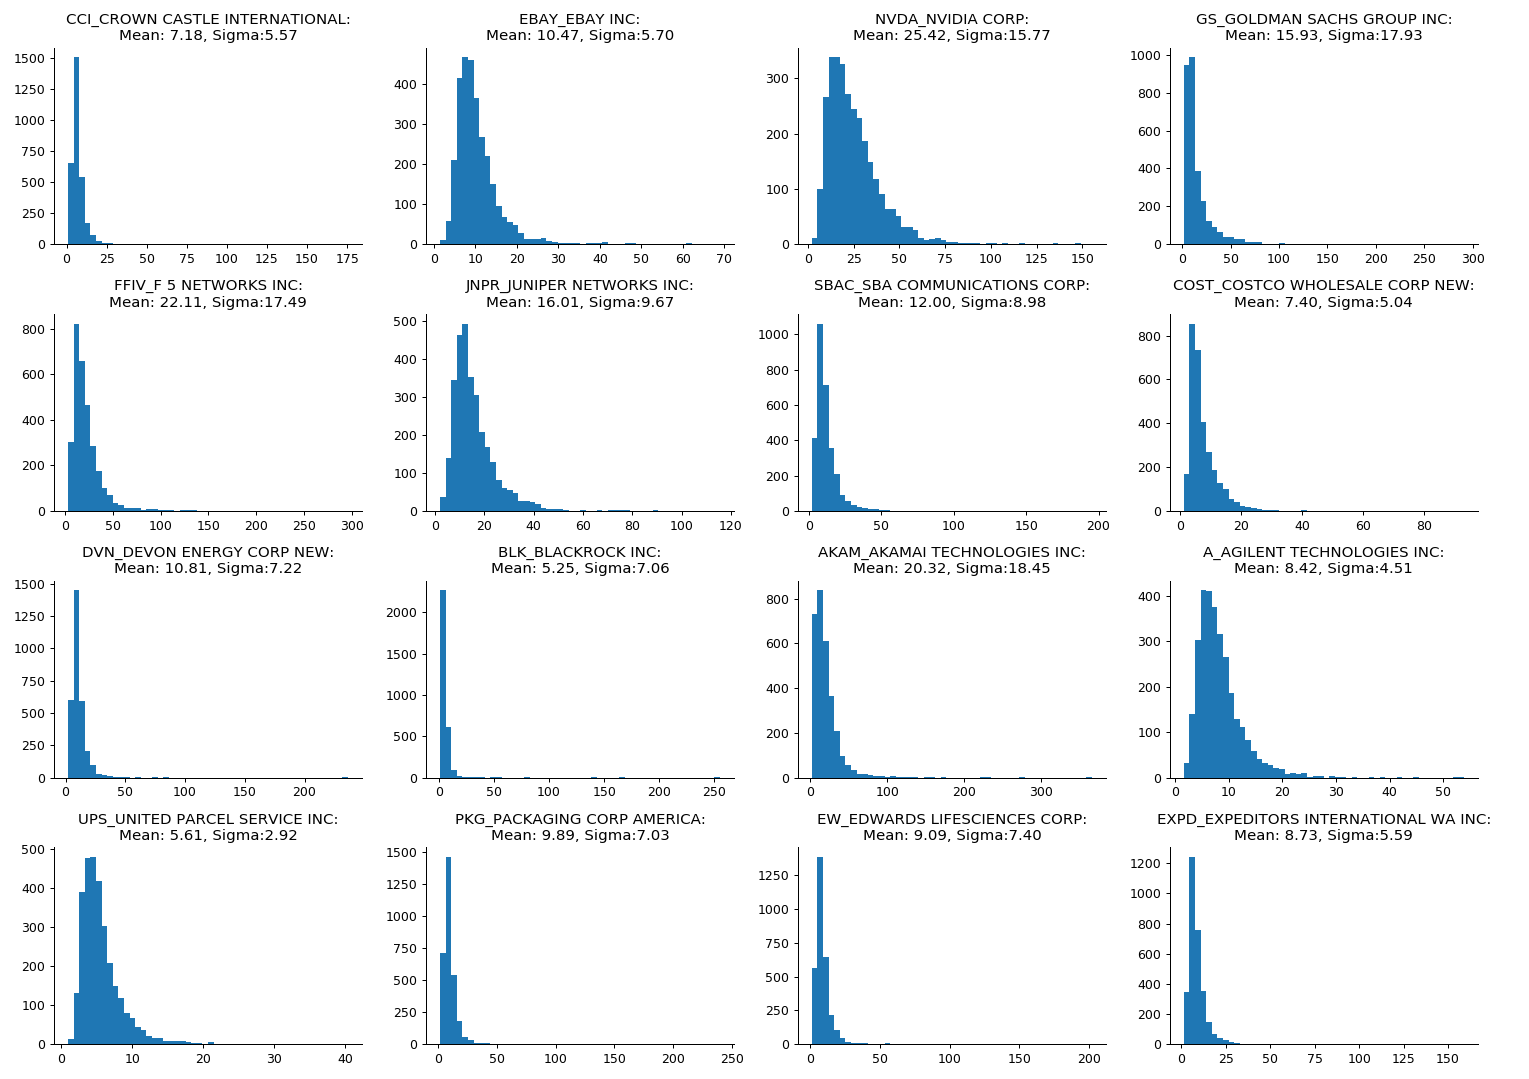









Batch 21


<IPython.core.display.Javascript object>


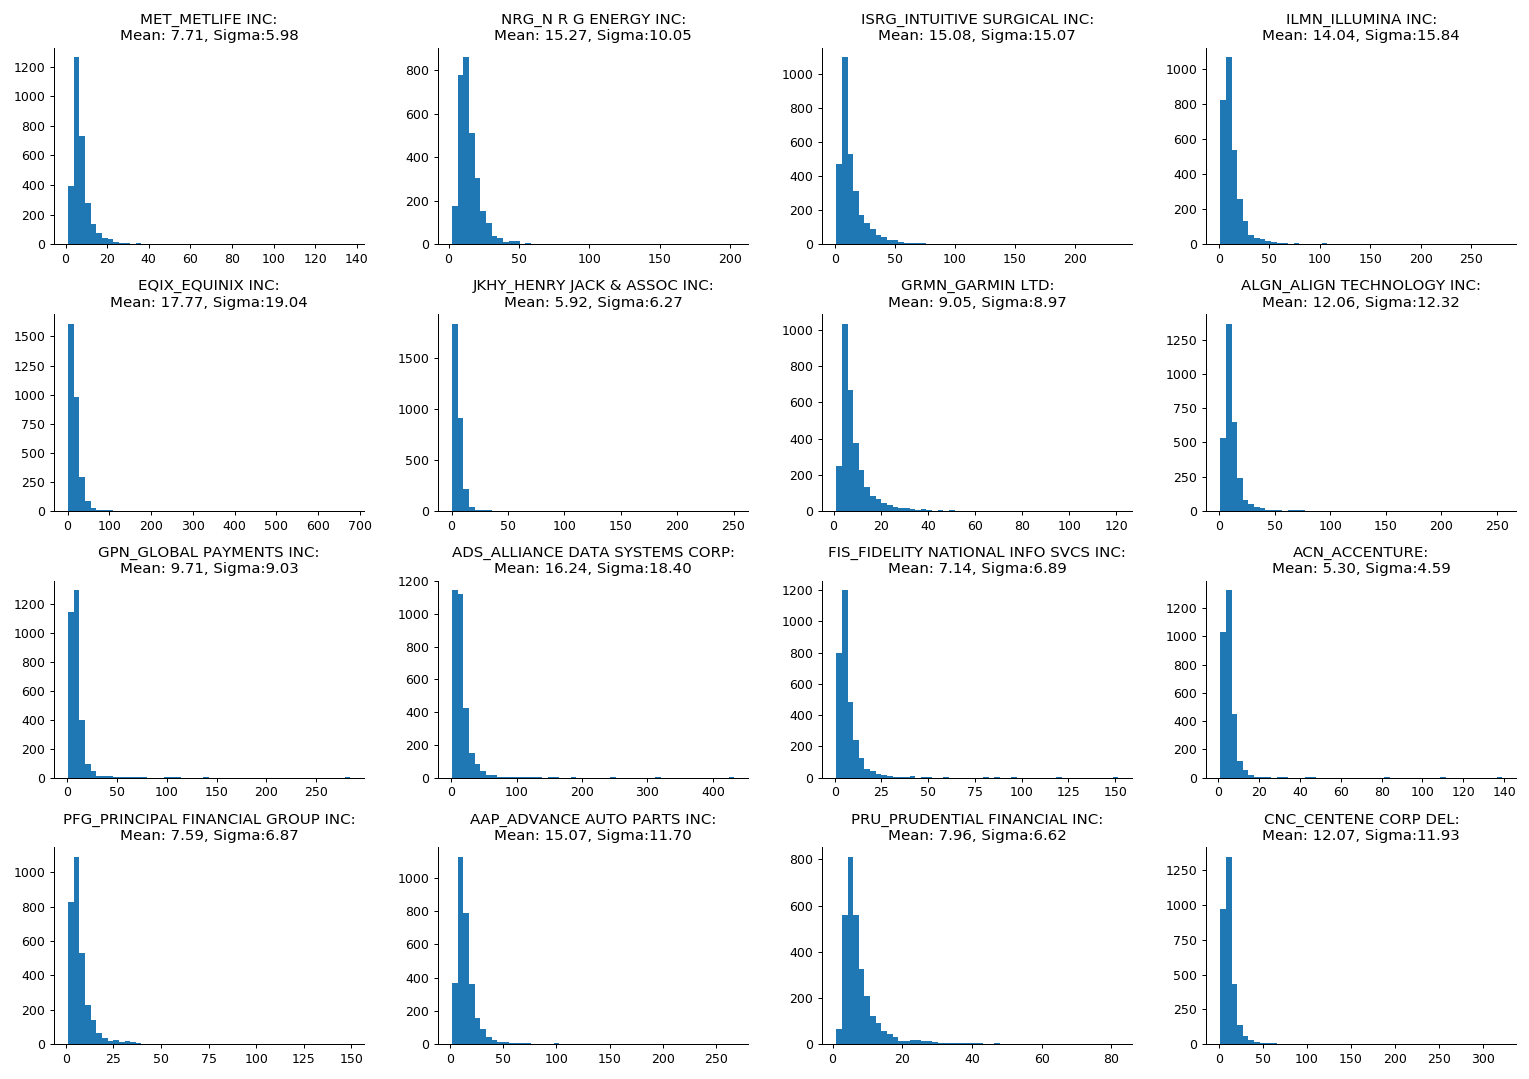









Batch 22


<IPython.core.display.Javascript object>


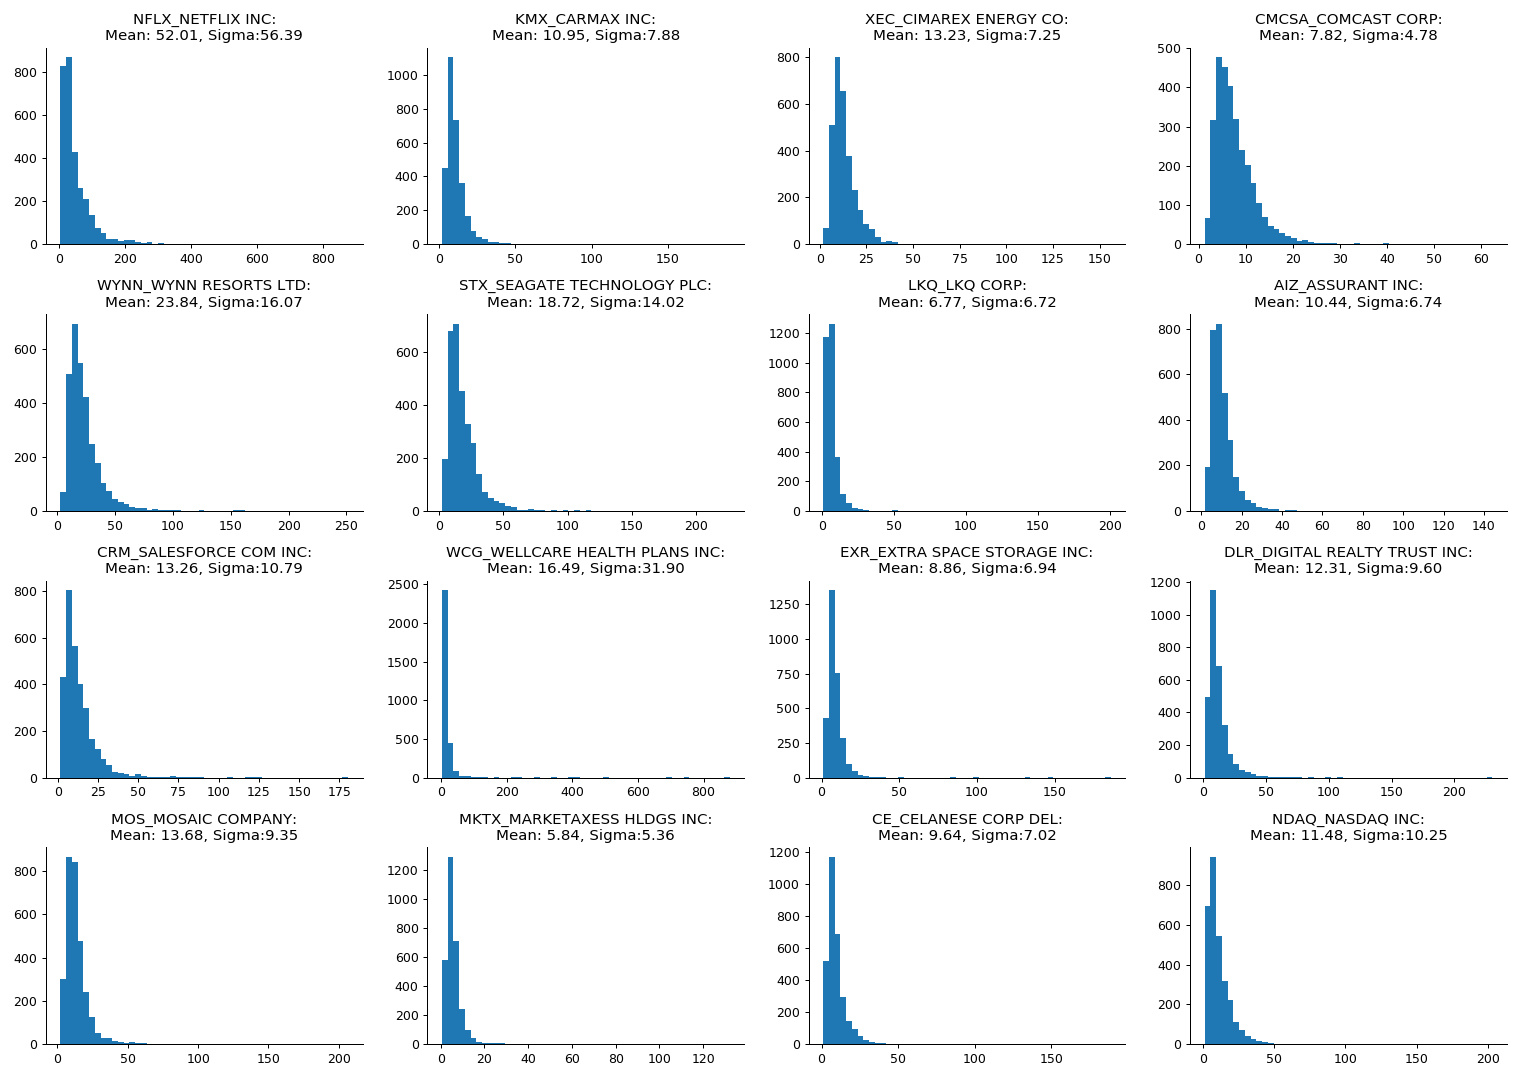









Batch 23


<IPython.core.display.Javascript object>


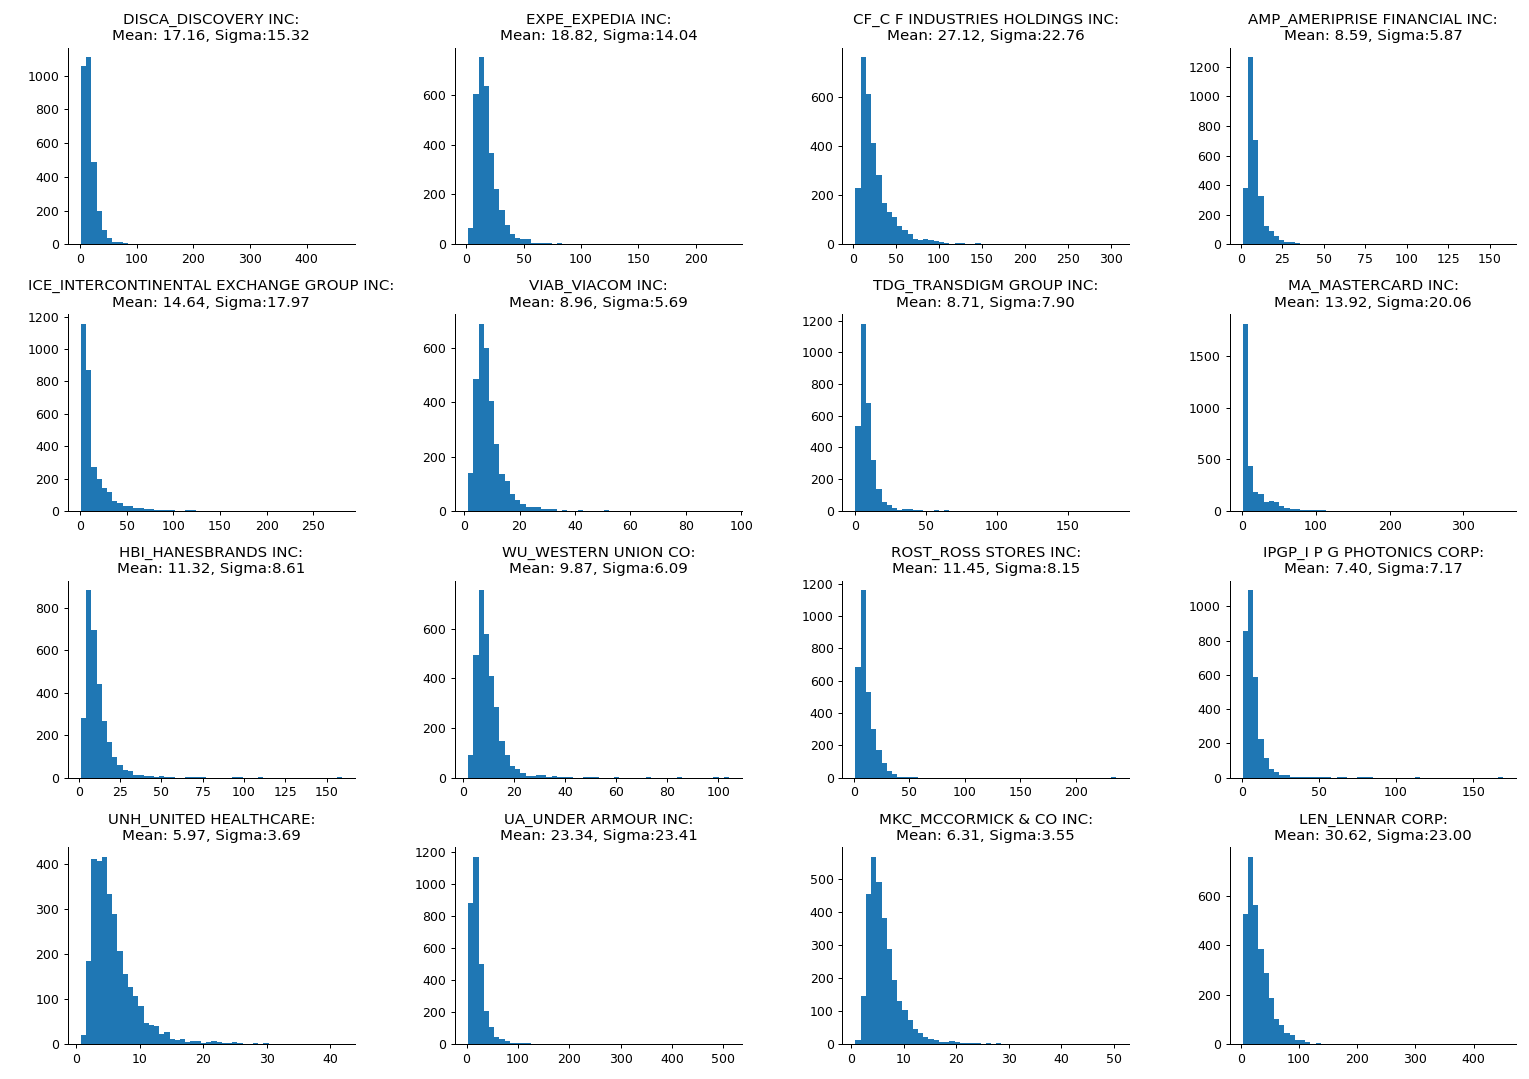

In [14]:
### matrix of subplots
n_cols = 4
n_rows = 4
n_plots = n_cols*n_rows
nloops = int(np.floor(388/n_plots))
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)


for i in range(nloops):
    nn = len(df_volume_sharesout.columns)
    lower = i*n_plots
    upper = (i+1)*n_plots
    #print(lower, upper)
    temp_list = df_volume_sharesout.columns[lower:upper]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))    
    
    fig, ax = plt.subplots(n_cols,n_rows,figsize=(17,12))
    for k in range(n_rows):
        for l in range(n_cols):
            ###--Generate Plot---## 
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            temp_mean = round(df_volume_sharesout[symbol].describe()['mean'], 4)
            temp_sigma = round(df_volume_sharesout[symbol].describe()['std'], 4)
            
            ##--Generate Plot--#        
            ax[k,l].hist(df_volume_sharesout[symbol], bins=50)
            ax[k,l].set_title('{}:\nMean: {:,.2f}, Sigma:{:,.2f}'.format(symbol, temp_mean, temp_sigma))
            #ax[k,l].set_xlim([0, 0.3])
            #ax[k,l].set_ylim([0,1100])
            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)
                        
    fig.subplots_adjust(hspace=0.7)
    plt.tight_layout()
    plt.show()

### Leftovers









Batch 0


<IPython.core.display.Javascript object>


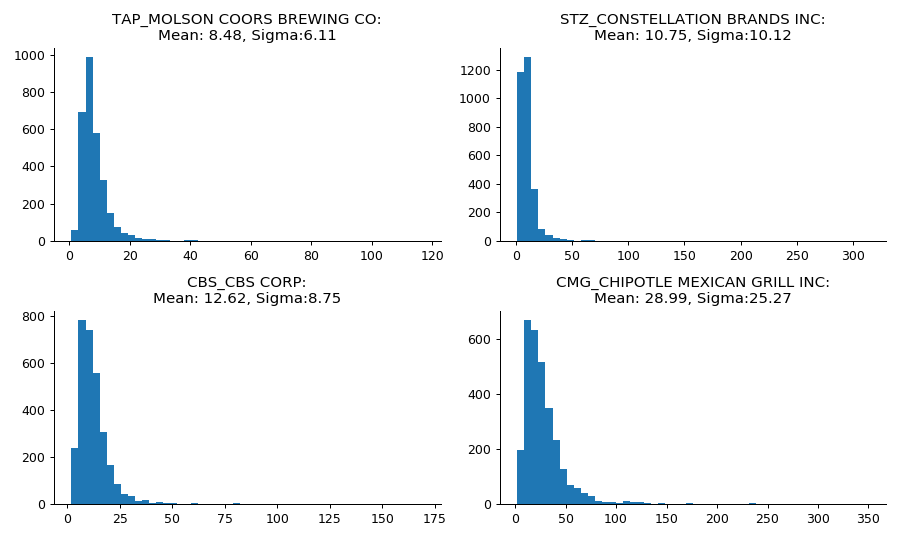

In [13]:
### matrix of subplots
n_cols = 2
n_rows = 2
n_plots = n_cols*n_rows
nloops = 1
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)



for i in range(nloops):
    nn = len(df_sharesout.columns)
    #print(lower, upper)
    temp_list = df_sharesout.columns[-n_plots:]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))  
    fig, ax = plt.subplots(n_cols,n_rows,figsize=(10,6))
    for k in range(n_rows):
        for l in range(n_cols):
            ###--Generate Plot---## 
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            temp_mean = round(df_volume_sharesout[symbol].describe()['mean'], 4)
            temp_sigma = round(df_volume_sharesout[symbol].describe()['std'], 4)
            
            ##--Generate Plot--#        
            ax[k,l].hist(df_volume_sharesout[symbol], bins=50)
            ax[k,l].set_title('{}:\nMean: {:,.2f}, Sigma:{:,.2f}'.format(symbol, temp_mean, temp_sigma))
            #ax[k,l].set_xlim([0, 0.3])
            #ax[k,l].set_ylim([0,1100])
            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)
                        
    fig.subplots_adjust(hspace=0.7)
    plt.tight_layout()
    plt.show()    